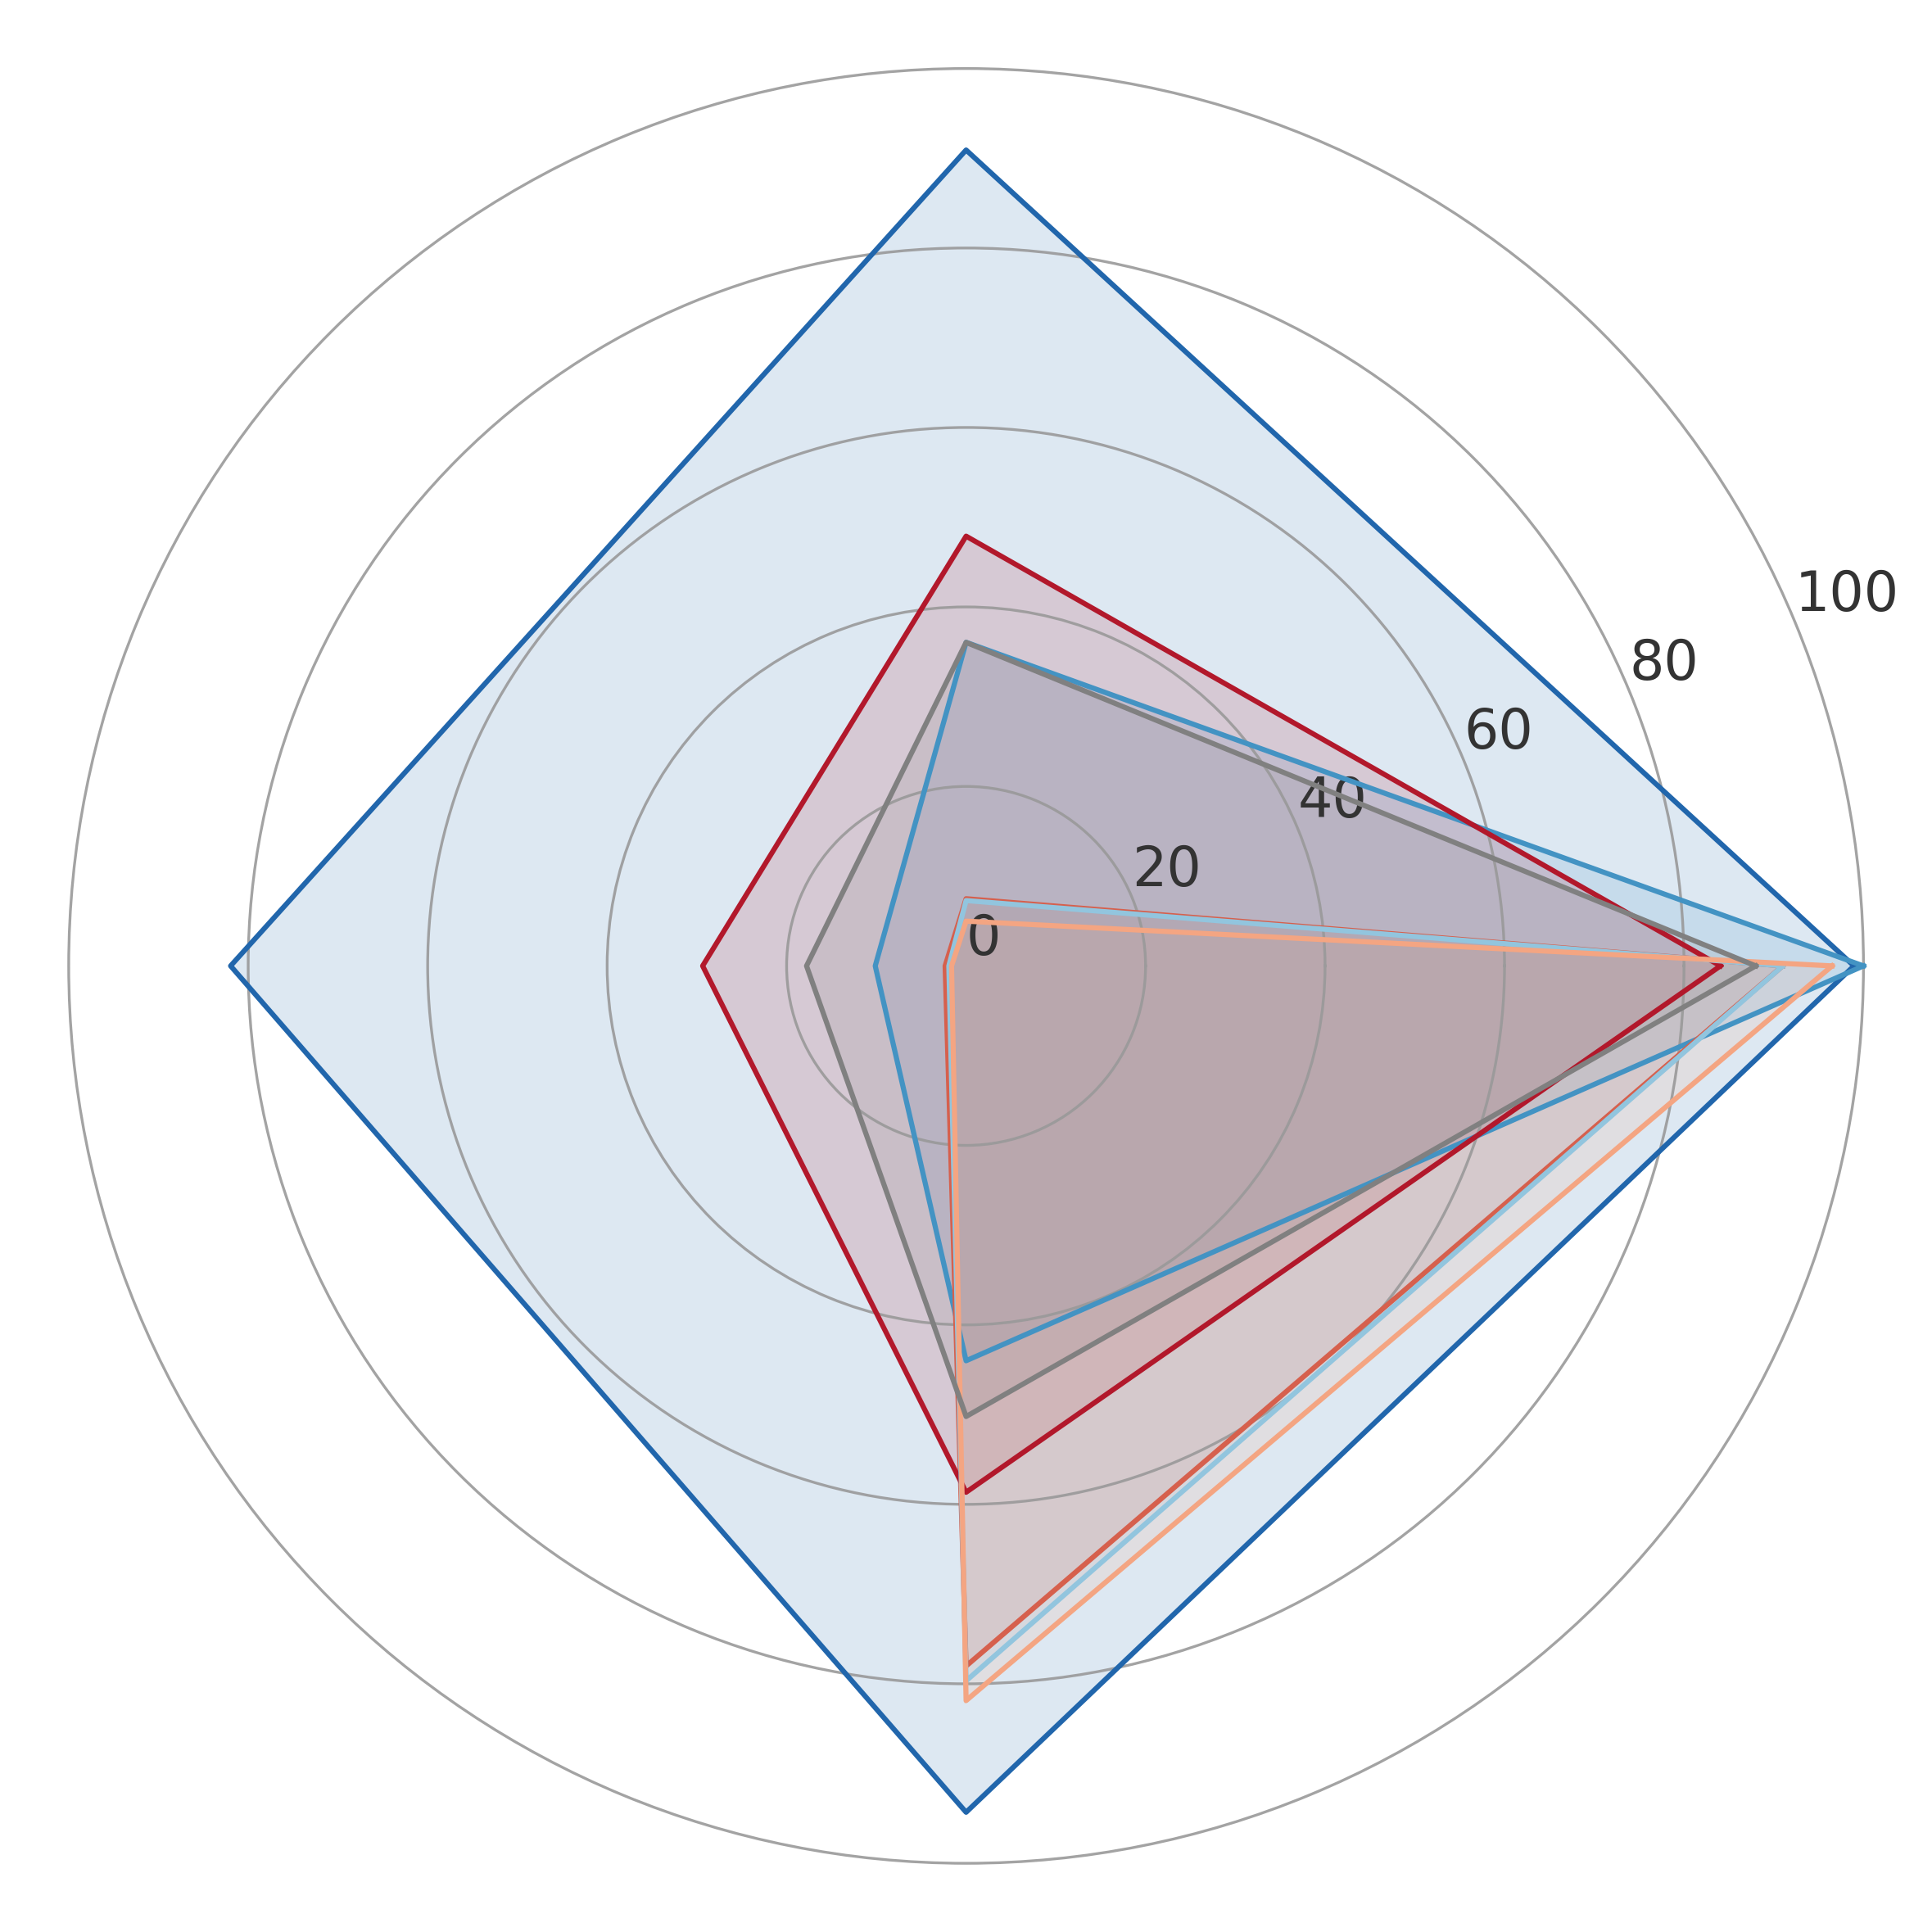

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
from scipy.interpolate import make_interp_spline

# Load single data
data = pd.DataFrame({
    'model': ['MultiMol', 'GS-Mutate', 'High Variance', 'MoleculeSTM', 'PCA', 'Random', 'w/o fine-tune'],
    'Valid Ratio': [98.937500, 100, 91, 84.0625, 91.0, 96.5, 88.0],
    'Hit Ratio(loose)': [90.920381, 36.0625, 7.4875, 47.89, 7.2825, 4.9875, 36.0525],
    'Hit Ratio(strict)': [81.959630, 10.125, 2.33625, 29.35875, 1.925, 1.62, 17.78125],
    'Same Scaffold Ratio': [94.316188, 44.0, 78.02, 58.65625, 79.67, 81.87, 50.21375]
})

# Load multiple data
# data = pd.DataFrame({
#     'model': ['MultiMol', 'GS-Mutate', 'High Variance', 'MoleculeSTM', 'PCA', 'Random', 'w/o fine-tune'],
#     'Valid Ratio': [92.58333, 100, 91, 80.41666667, 91, 96.5, 88],
#     'Hit Ratio(loose)': [82.300948, 11.5, 1.923333333, 27.5, 1.191666667, 0.691666667, 10.7],
#     'Hit Ratio(strict)': [66.489632, 1.333333333, 0.55, 12.02, 0.275, 0.173333333, 2.991666667],
#     'Same Scaffold Ratio': [91.707186, 44, 78.02, 58.03833333, 79.67, 81.87, 49.46666667]
# })

# Set style to white background
# plt.style.use('seaborn-white')

# Set number of variables
categories = list(data.columns[1:])
N = len(categories)

# Define angles for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialize radar chart with higher DPI and specific figure size
fig, ax = plt.subplots(figsize=(8, 8), dpi=300, subplot_kw=dict(polar=True))

# Define professional color palette (Nature style)
color_mapping = {
    'MultiMol': '#2166AC',        # Deep blue
    'MoleculeSTM': '#B2182B',     # Deep red
    'GS-Mutate': '#4393C3',       # Medium blue
    'High Variance': '#D6604D',    # Medium red
    'PCA': '#92C5DE',             # Light blue
    'Random': '#F4A582',          # Light red
    'w/o fine-tune': '#808080'    # Grey
}

for i, row in data.iterrows():
    values = row.drop('model').values.flatten().tolist()
    values += values[:1]
    
    ax.plot(angles, values, label=row['model'], linewidth=1.5, 
            color=color_mapping[row['model']], alpha=1.0)
    ax.fill(angles, values, alpha=0.15, color=color_mapping[row['model']])

# Customize the chart
# ax.set_xticks(angles[:-1])
# ax.set_xticklabels(categories, fontsize=10)
ax.set_xticks([])
ax.set_xticklabels([], fontsize=10)
# ax.set_yticks([])
# ax.set_yticklabels([], fontsize=10)
# Set y-axis ticks and labels
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_yticklabels(['0', '20', '40', '60', '80', '100'], 
                   fontsize=16, color='#333333')

# Add gridlines with higher visibility
ax.grid(True, color='#999999', alpha=0.9, linewidth=0.8)

# Remove axis lines
ax.spines['polar'].set_visible(False)

# Customize legend
# legend = plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5),
#                    frameon=False, fontsize=9)
for line in legend.get_lines():
    line.set_linewidth(2)

# Adjust layout
plt.tight_layout()

# Save with high DPI
plt.savefig('./svg/radar_single.svg', dpi=300, bbox_inches='tight')
plt.show()

### Transfer Learning

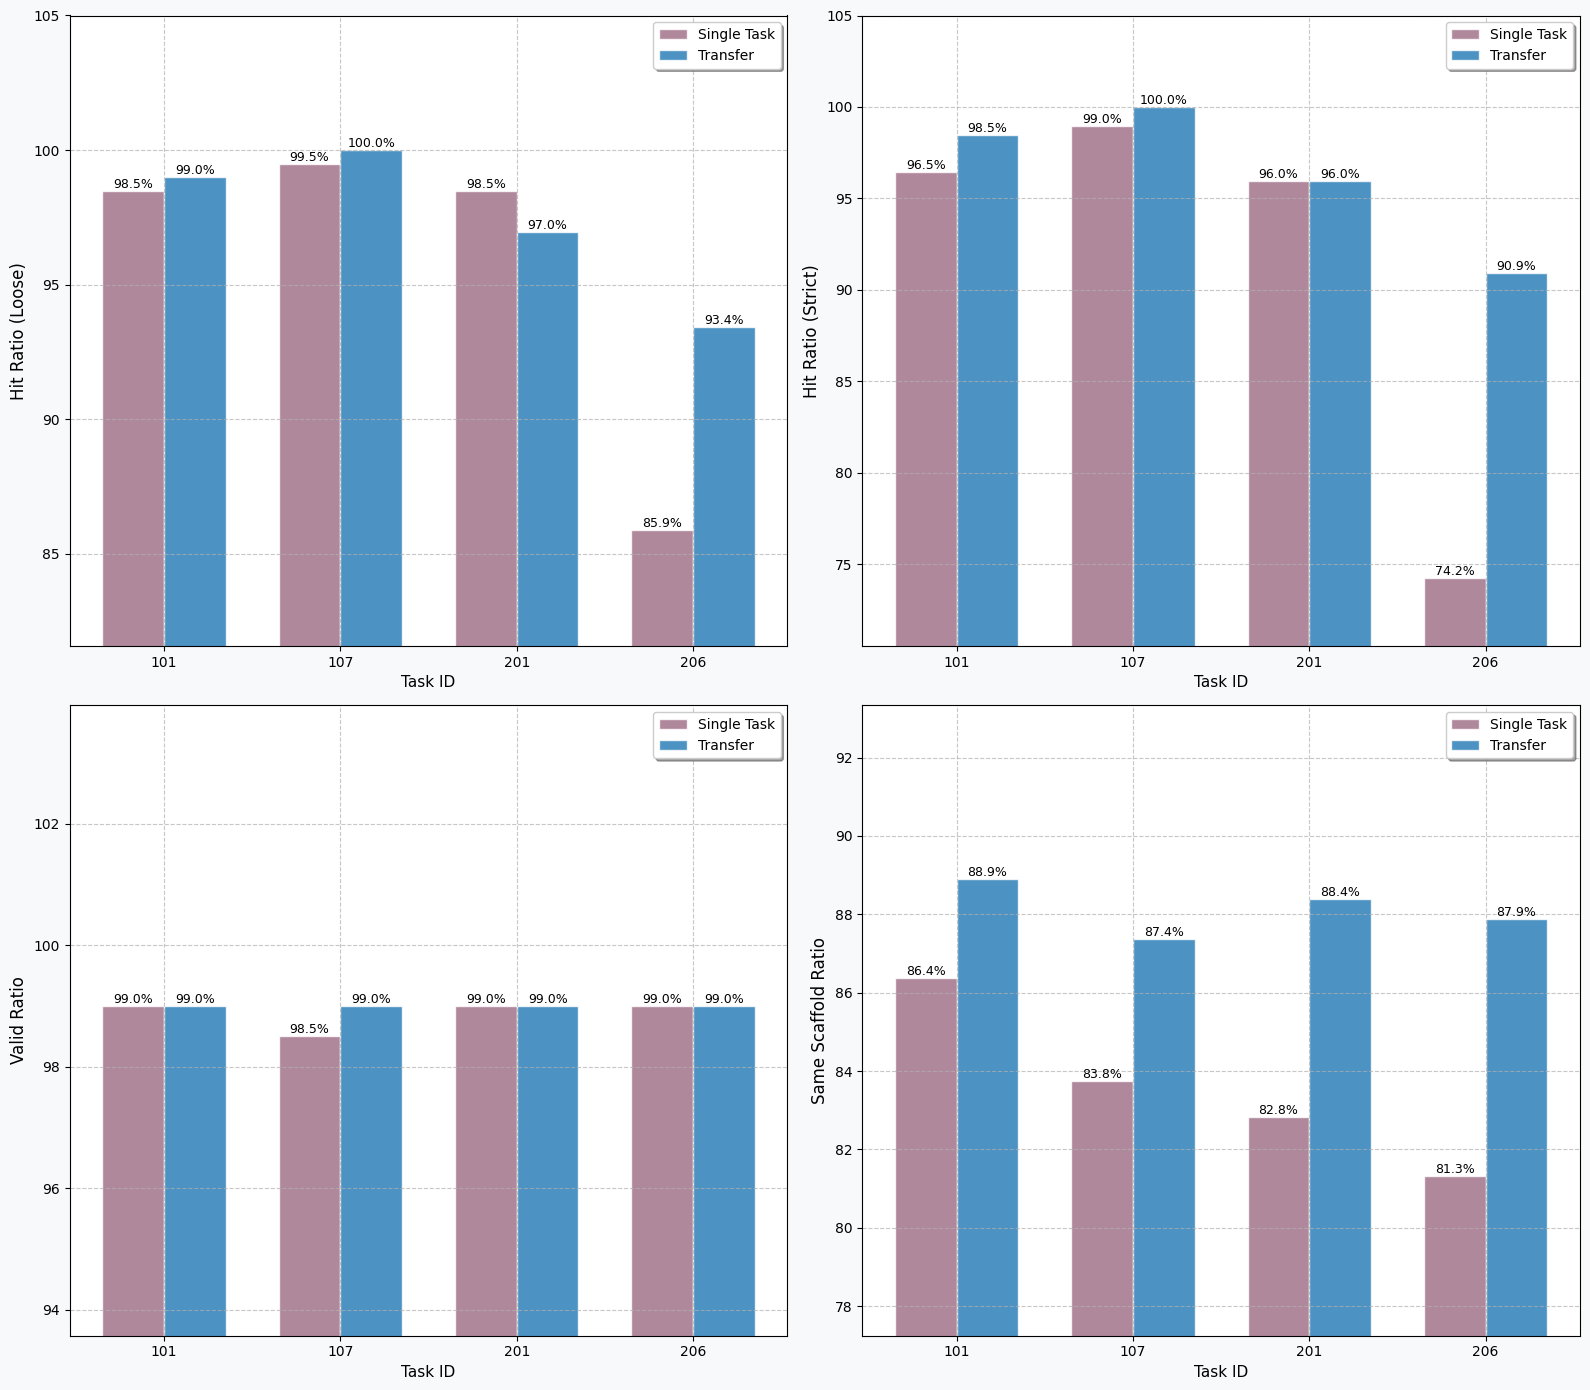


Statistical Comparison:

Hit Ratio Loose:
------------------------------
Single Task Mean:        95.58%
Transfer Learning Mean:  97.35%
Improvement:            1.77%

Hit Ratio Strict:
------------------------------
Single Task Mean:        91.41%
Transfer Learning Mean:  96.34%
Improvement:            4.93%

Valid Ratio:
------------------------------
Single Task Mean:        98.88%
Transfer Learning Mean:  99.00%
Improvement:            0.12%

Same Scaffold Ratio:
------------------------------
Single Task Mean:        83.57%
Transfer Learning Mean:  88.13%
Improvement:            4.57%


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

# Create DataFrames for single task and transfer learning
single_task_data = pd.DataFrame([
    [101, 16, 98.4848, 96.4646, 99.0000, 86.3636],
    [107, 16, 99.4924, 98.9848, 98.5000, 83.7563], 
    [201, 16, 98.4848, 95.9596, 99.0000, 82.8283],
    [206, 16, 85.8586, 74.2424, 99.0000, 81.3131]
], columns=['Task_id', 'k', 'hit_ratio_loose', 'hit_ratio_strict', 'valid_ratio', 'same_scaffold_ratio'])

transfer_data = pd.DataFrame([
    [101, 16, 98.9899, 98.4848, 99.0000, 88.8889],
    [107, 16, 100.0000, 100.0000, 99.0000, 87.3737],
    [201, 16, 96.9697, 95.9596, 99.0000, 88.3838],
    [206, 16, 93.4343, 90.9091, 99.0000, 87.8788]
], columns=['Task_id', 'k', 'hit_ratio_loose', 'hit_ratio_strict', 'valid_ratio', 'same_scaffold_ratio'])

# Set style
# plt.style.use('seaborn')
# sns.set_palette("husl")

# Create comparison plots
metrics = ['hit_ratio_loose', 'hit_ratio_strict', 'valid_ratio', 'same_scaffold_ratio']
y_labels = ['Hit Ratio (Loose)', 'Hit Ratio (Strict)', 'Valid Ratio', 'Same Scaffold Ratio']
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Custom color palette
colors = ['#9c6a84', '#1f77b4']

for idx, (metric, y_label) in enumerate(zip(metrics, y_labels)):
    ax = axes[idx//2, idx%2]
    
    x = range(len(single_task_data['Task_id']))
    width = 0.35
    
    # Add bars with alpha for transparency
    bars1 = ax.bar([i - width/2 for i in x], single_task_data[metric], width, 
                   label='Single Task', color=colors[0], alpha=0.8,
                   edgecolor='white', linewidth=1)
    bars2 = ax.bar([i + width/2 for i in x], transfer_data[metric], width,
                   label='Transfer', color=colors[1], alpha=0.8,
                   edgecolor='white', linewidth=1)
    
    # Add value labels on top of bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}%',
                   ha='center', va='bottom', fontsize=9)
    
    autolabel(bars1)
    autolabel(bars2)
    
    # Customize each subplot
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(single_task_data['Task_id'], fontsize=10)
    ax.legend(frameon=True, fancybox=True, shadow=True)
    ax.set_xlabel('Task ID', fontsize=11)
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Set y-axis limits with some padding
    ax.set_ylim(min(min(single_task_data[metric]), min(transfer_data[metric])) * 0.95,
                max(max(single_task_data[metric]), max(transfer_data[metric])) * 1.05)

plt.tight_layout()

# Add a background color
fig.patch.set_facecolor('#f8f9fa')
for ax in axes.flat:
    ax.set_facecolor('#ffffff')

plt.show()


### Different Model Size

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('./data/size_multi.csv')
# 数据转换
df_melted = df.melt(id_vars=['model_size', 'task_id'], 
                    value_vars=['Valid Ratio',  'Hit Ratio(loose)','Hit Ratio(strict)','Same Scaffold Ratio'],
                    var_name='metric', value_name='value')

# 设置绘图风格
sns.set(style="whitegrid")
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))

# 创建图形
plt.figure(figsize=(12, 6))

# 设置绘图风格
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(12, 6))

# 获取颜色调色板
palette = sns.color_palette("Set2", n_colors=len(df['model_size'].unique()))

# 绘制箱型图，使用指定的颜色和加粗的轮廓
sns.boxplot(data=df_melted, x='metric', y='value', hue='model_size', 
            palette=palette, dodge=True, 
            boxprops=dict(linewidth=1.5, edgecolor='black'),  # 加粗箱子的外轮廓为黑色
            medianprops=dict(linewidth=1.5, color='black'),  # 中位线为黑色
            whiskerprops=dict(linewidth=1.5, color='black'),  # 须线为黑色
            flierprops=dict(markeredgecolor='black', linewidth=2))  # 加粗异常值的轮廓为黑色

# 设置标题和标签
# plt.title('Comparison of Model Sizes Across Different Metrics', fontsize=16)
plt.xlabel('Metric', fontsize=20)
plt.ylabel('Value', fontsize=20)
plt.legend(title='Model Size', fontsize=16, title_fontsize='16')
plt.tick_params(axis='both', which='major', labelsize=16)
# 保存图像
plt.tight_layout()
plt.savefig(f'./svg/model_size_multi_with_legend.svg', format='svg', bbox_inches='tight')
# plt.savefig('model_size_comparison_boxplot.png', dpi=300)
plt.show()


ModuleNotFoundError: No module named 'seaborn'

### Regression

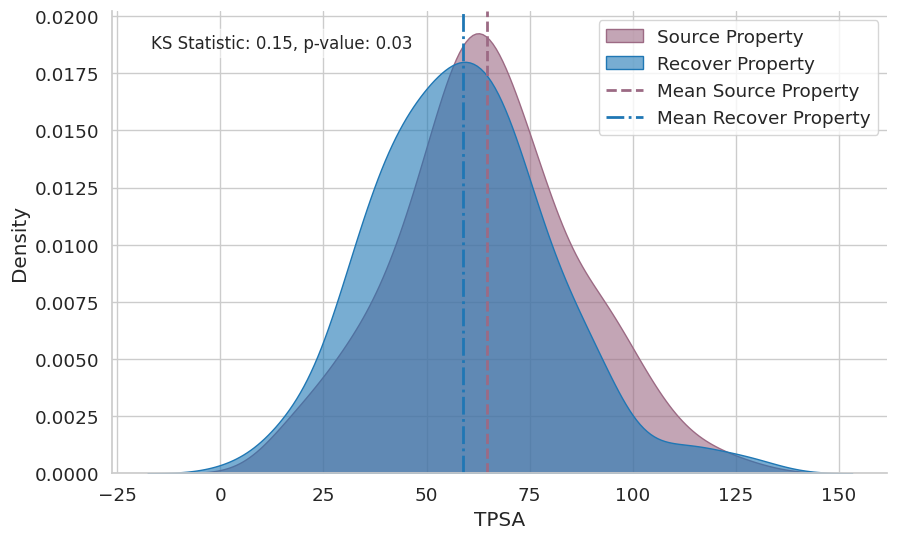

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Your provided data (synthetic example to match a larger dataset)
task_id_map = {
    "101": ["MolLogP"], "102": ["MolLogP"], "103": ["qed"], "104": ["qed"], 
    "105": ["TPSA"], "106": ["TPSA"], "107": ["NumHAcceptors"], "108": ["NumHDonors"]
    }

for task_id in ['101', '102', '103', '104', '105', '106', '107', '108']:
    df = pd.read_csv(f'./data/regression_{task_id}x.csv')
    prop = task_id_map[task_id][0]
    df = df[df[f'gene_{prop}']!=-999]

    group1 = df[f'{prop}'].tolist()
    group2 = df[f'gene_{prop}'].tolist()

    sns.set(style="whitegrid", font_scale=1.2)

    # Use a more refined and natural color palette
    palette = ['#9c6a84', '#1f77b4']  # A combination of soft green and muted pink
    # Create the figure and axis
    plt.figure(figsize=(10, 6))

    # Plot the KDE for each group with transparency
    sns.kdeplot(group1, color=palette[0], fill=True, alpha=0.6, label="Source Property")
    sns.kdeplot(group2, color=palette[1], fill=True, alpha=0.6, label="Recover Property")

    # Calculate and plot the mean lines for each group
    mean_group1 = np.mean(group1)
    mean_group2 = np.mean(group2)

    plt.axvline(mean_group1, color=palette[0], linestyle='--', linewidth=2, label='Mean Source Property')
    plt.axvline(mean_group2, color=palette[1], linestyle='-.', linewidth=2, label='Mean Recover Property')

    # Calculate the KS statistic to quantify the difference between distributions
    ks_stat, p_value = ks_2samp(group1, group2)

    # Add KS statistic to the plot
    plt.text(0.05, 0.95, f'KS Statistic: {ks_stat:.2f}, p-value: {p_value:.2f}',  transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    # Add labels and legend
    plt.xlabel(f"{prop}")
    plt.ylabel("Density")
    plt.legend(loc='upper right')

    # Remove the top and right spines for a cleaner look
    sns.despine()

    # Show the plot
    # plt.savefig(f'./regression_{task_id}.pdf', bbox_inches='tight')
    plt.show()


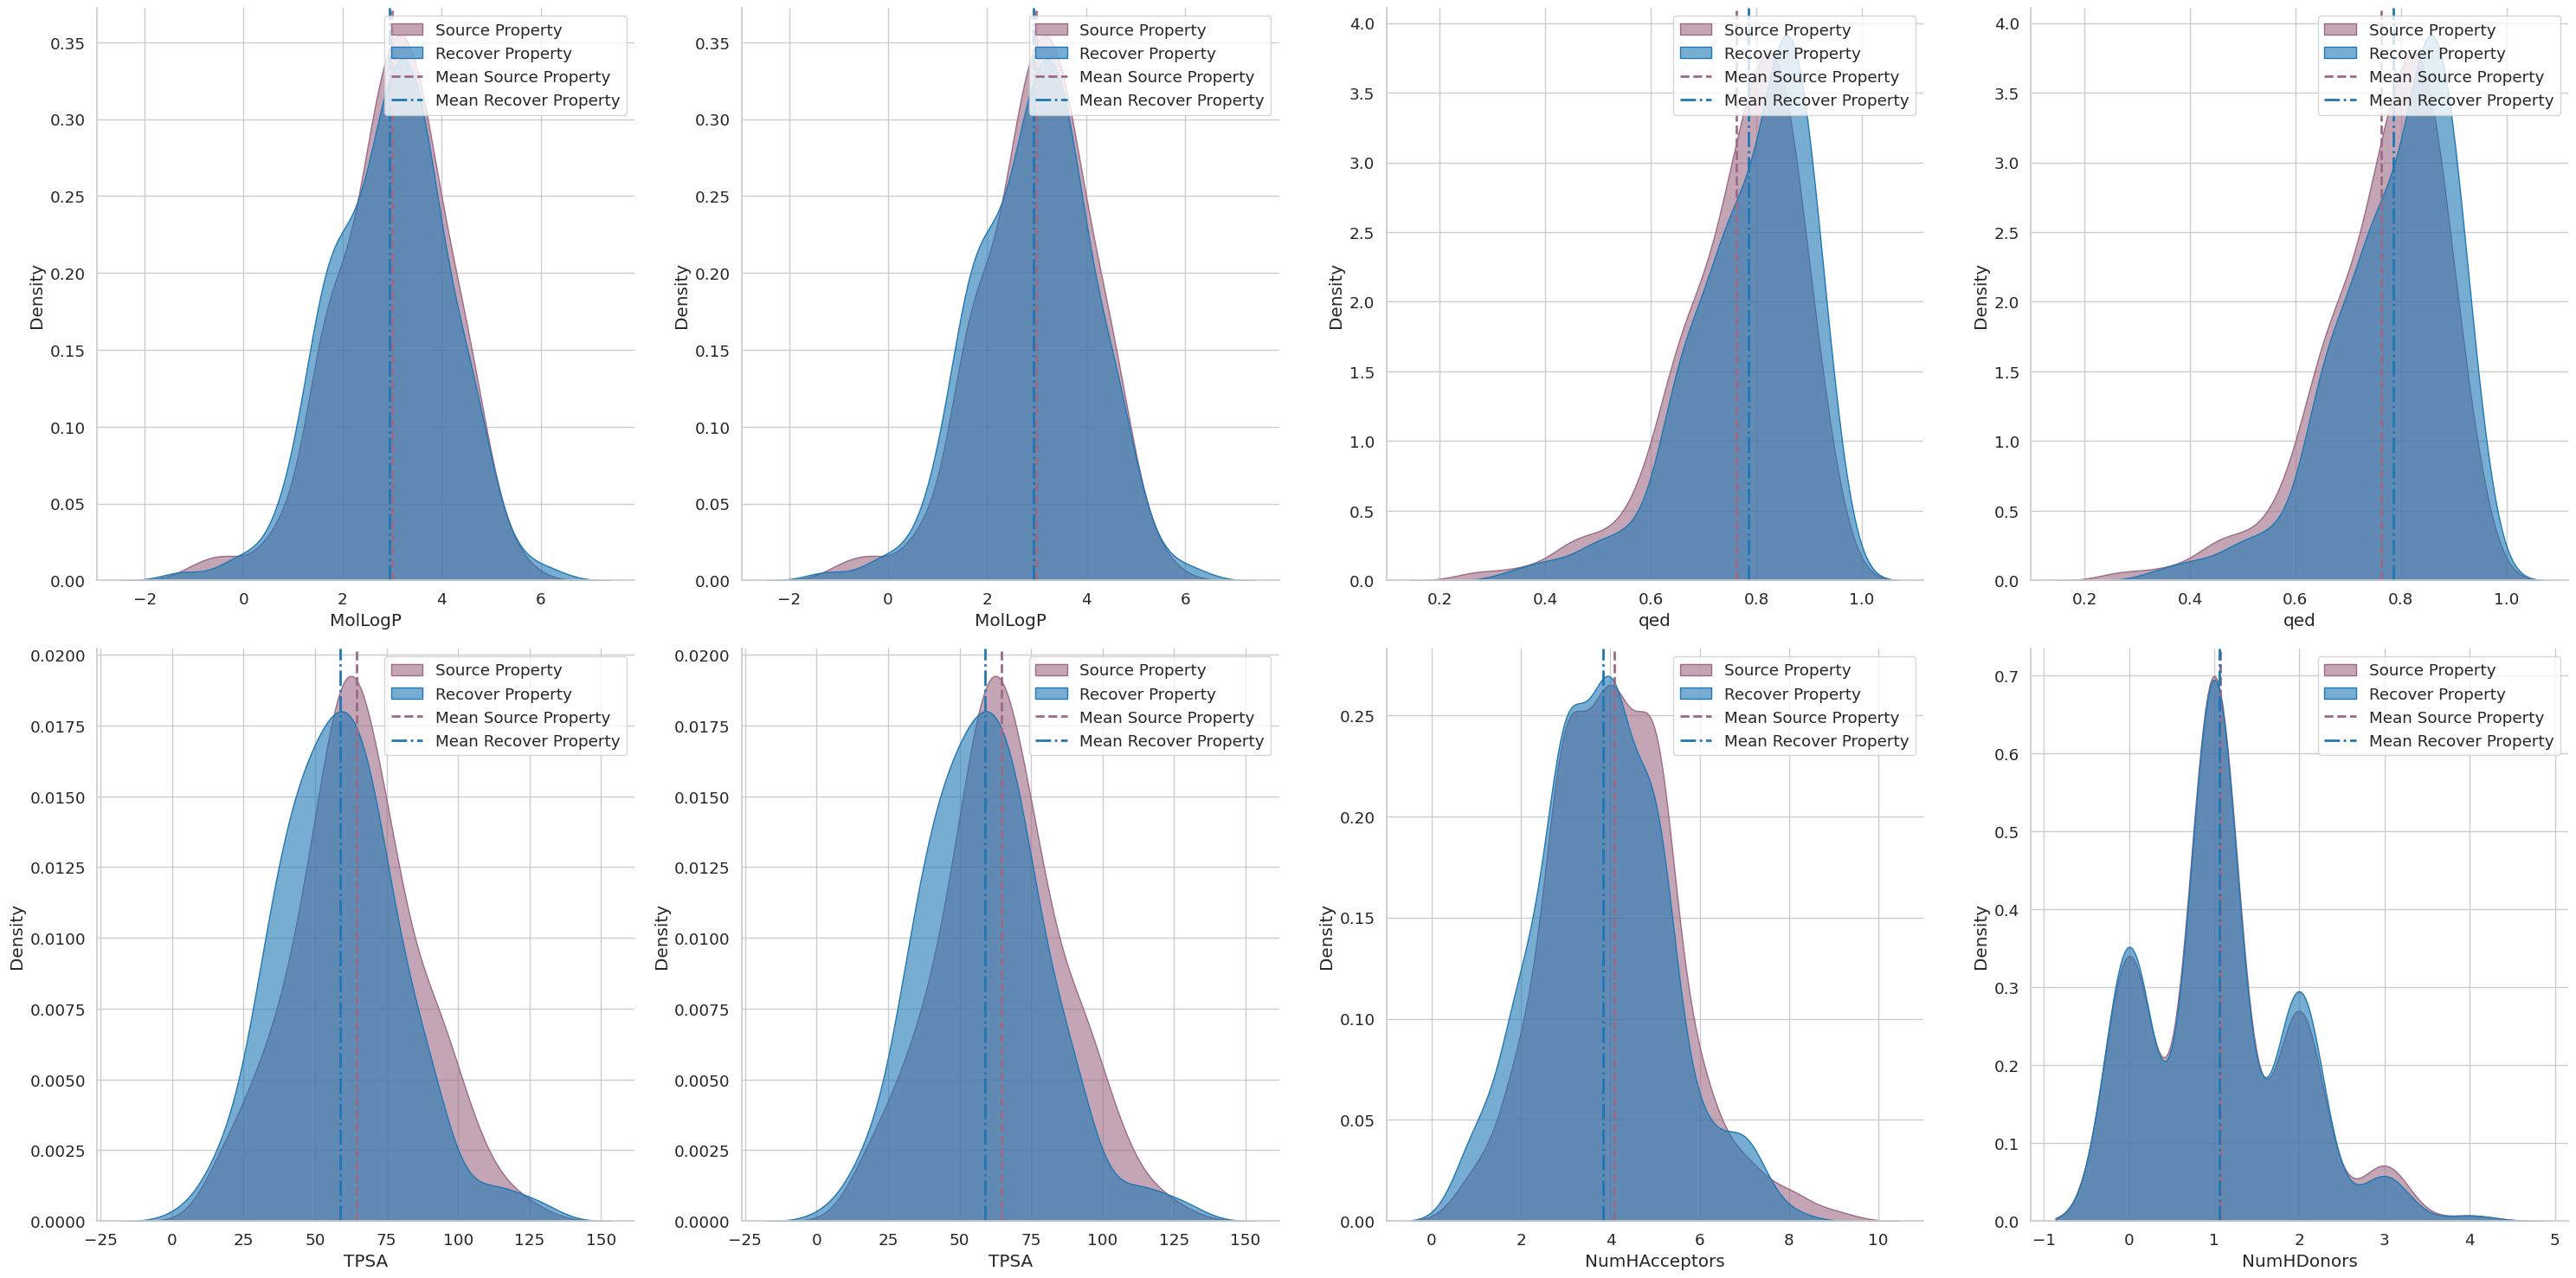

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your provided data (synthetic example to match a larger dataset)
task_id_map = {
    "101": ["MolLogP"], "102": ["MolLogP"], "103": ["qed"], "104": ["qed"], 
    "105": ["TPSA"], "106": ["TPSA"], "107": ["NumHAcceptors"], "108": ["NumHDonors"]
}

# Set up the overall figure with 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(30, 15))
axes = axes.flatten()

# Iterate through each task and create a subplot
for idx, task_id in enumerate(['101', '102', '103', '104', '105', '106', '107', '108']):
    # df = pd.read_csv(f'./data/base_galactica30b_base_{task_id}x_16_scaffold.csv')
    df = pd.read_csv(f'./data/regression_{task_id}x.csv')
    prop = task_id_map[task_id][0]
    df = df[df[f'gene_{prop}'] != -999]
    df = df[df[f'{prop}'] != -999]
    

    group1 = df[f'{prop}'].tolist()
    group2 = df[f'gene_{prop}'].tolist()

    sns.set(style="whitegrid", font_scale=1.2)

    # Use a more refined and natural color palette
    palette = ['#9c6a84', '#1f77b4']   # A combination of soft green and muted pink

    # Plot the KDE for each group with transparency on the corresponding axis
    sns.kdeplot(group1, color=palette[0], fill=True, alpha=0.6, label="Source Property", ax=axes[idx])
    sns.kdeplot(group2, color=palette[1], fill=True, alpha=0.6, label="Recover Property", ax=axes[idx])

    # Calculate and plot the mean lines for each group
    mean_group1 = np.mean(group1)
    mean_group2 = np.mean(group2)

    axes[idx].axvline(mean_group1, color=palette[0], linestyle='--', linewidth=2, label='Mean Source Property')
    axes[idx].axvline(mean_group2, color=palette[1], linestyle='-.', linewidth=2, label='Mean Recover Property')

    # Add labels and legend
    axes[idx].set_xlabel(f"{prop}")
    axes[idx].set_ylabel("Density")
    axes[idx].legend(loc='upper right')

    # Remove the top and right spines for a cleaner look
    sns.despine()

# Adjust layout to prevent overlap and save the final figure
plt.tight_layout()
# plt.savefig('./svg/regression_combined.svg', bbox_inches='tight')
# plt.savefig('./pdf/regression_combined.pdf', bbox_inches='tight')

plt.show()


### Auxiliary property

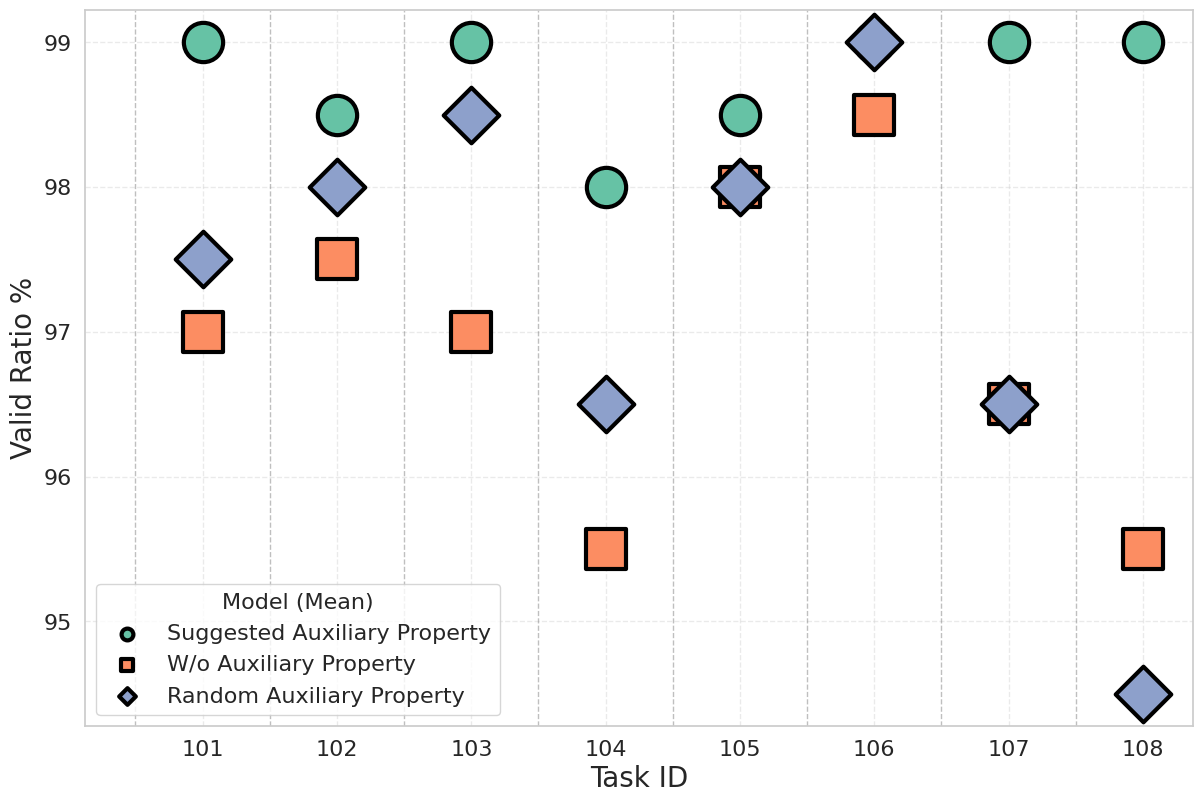

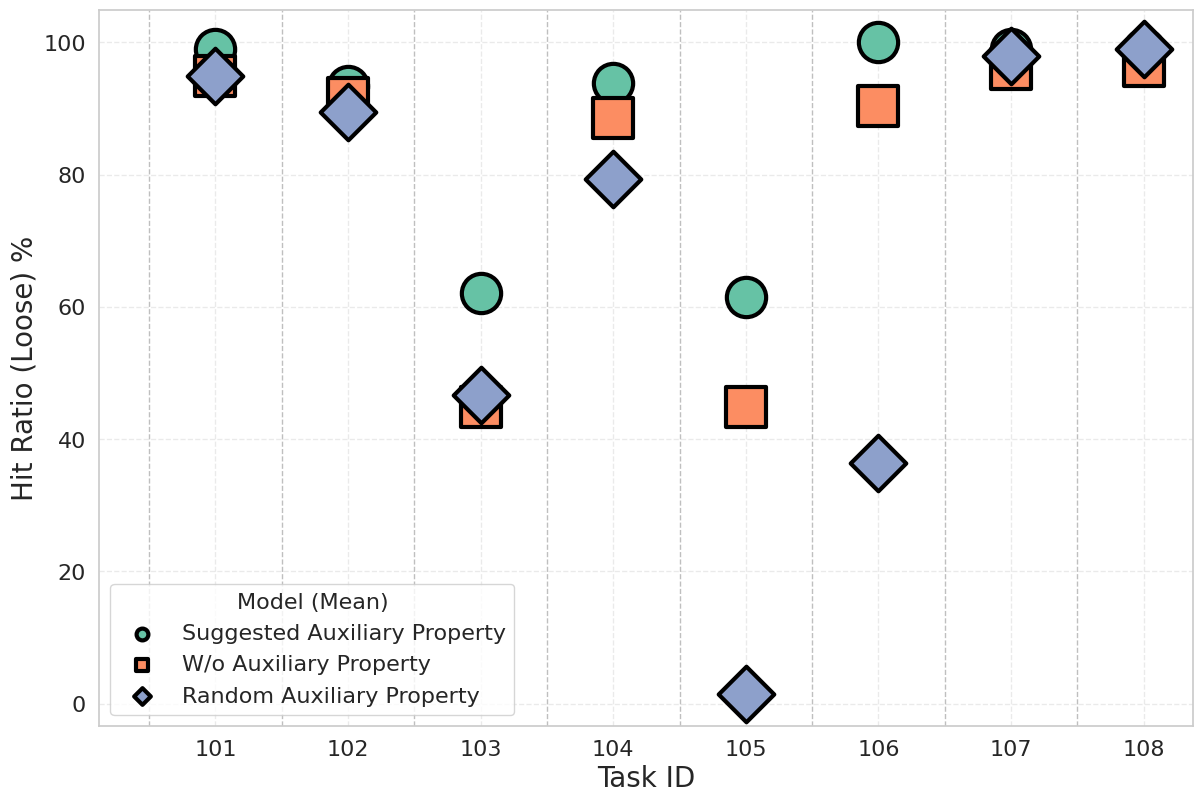

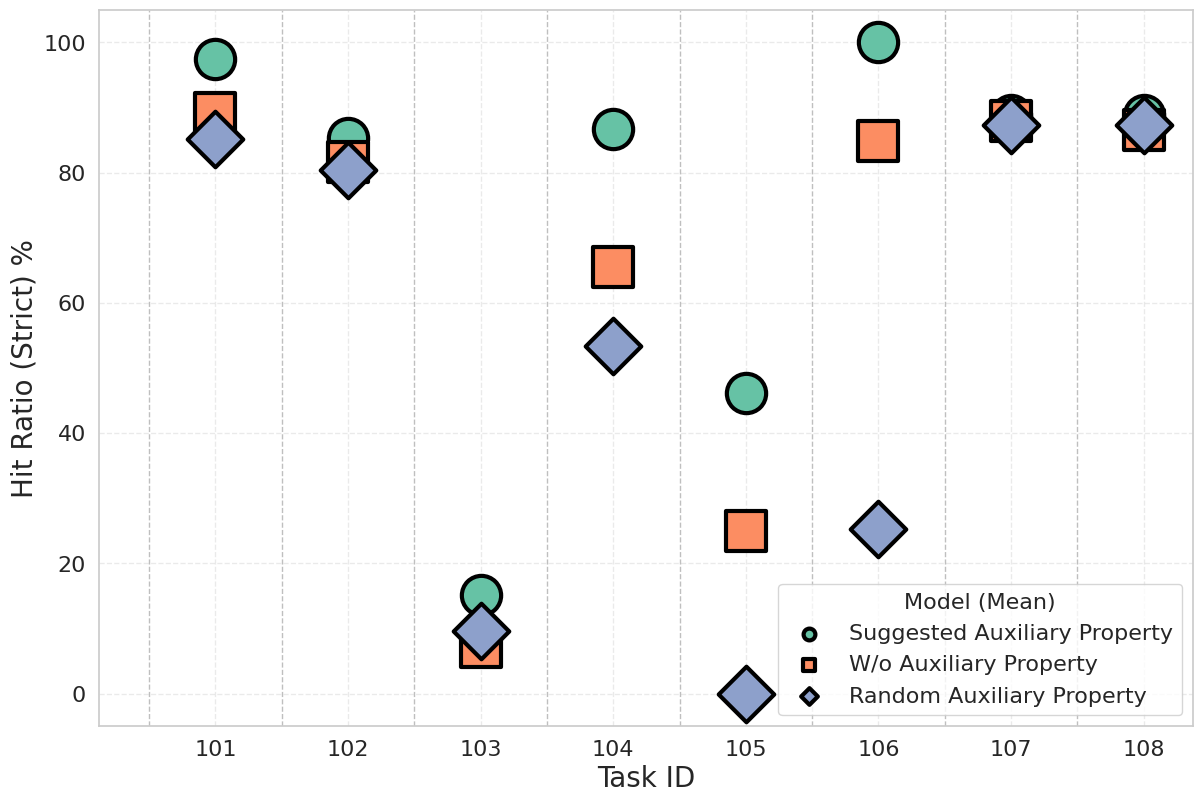

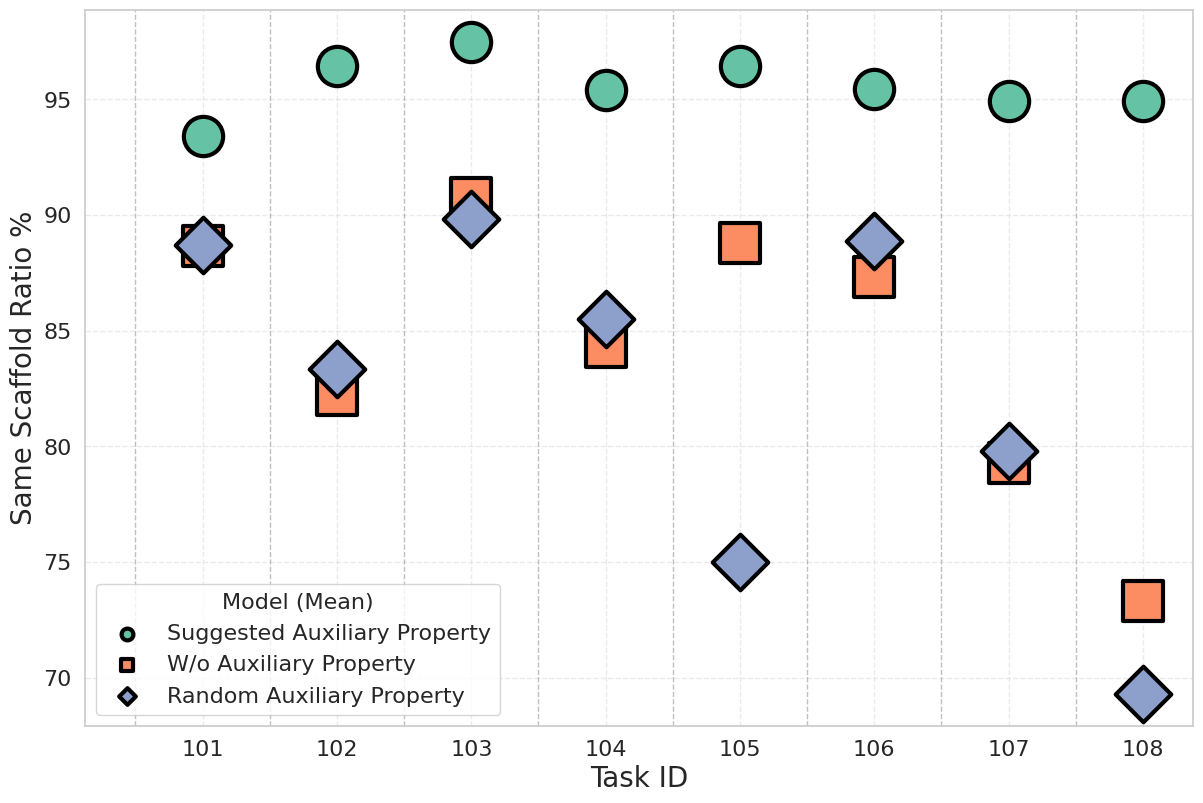

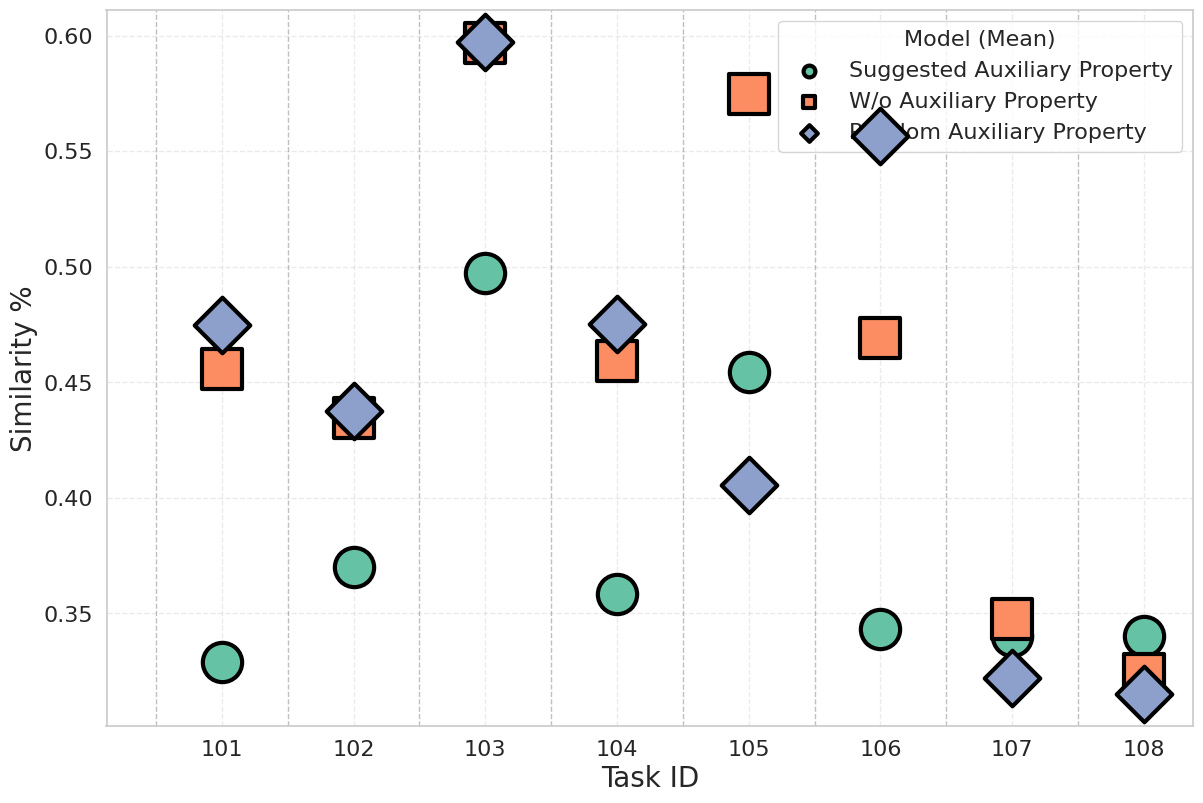

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm

# Load data from CSV
data = pd.read_csv('./data/auxiliary.csv')

# Set style to a nature-like aesthetic
sns.set(style="whitegrid")

# Define the metrics to plot
metrics = ['Valid Ratio', 'Hit Ratio (Loose)', 'Hit Ratio (Strict)', 'Same Scaffold Ratio', 'Similarity']
name_metrics = ['Valid Ratio', 'Hit Ratio(loose)', 'Hit Ratio(strict)', 'Same Scaffold Ratio', 'similarity']

# Define marker styles
markers = ['o', 's', 'D', '^', 'v']
palette = sns.color_palette("Set2", n_colors=len(data['model'].unique()))

# 指定字体文件路径
# font_path = '../../package/helvetica.ttf'
# font_prop = fm.FontProperties(fname=font_path)
# plt.rcParams['font.family'] = font_prop.get_name()
# Create separate plots for each metric
linestyles = ['dashed', 'dashdot', 'dotted']
for j, metric in enumerate(metrics):
    plt.figure(figsize=(12, 8))  # Adjusted size for better aesthetics
    ax = plt.gca()
    
    for i, model in enumerate(data['model'].unique()):
        subset = data[data['model'] == model]
        color = palette[i]  # Use the defined color palette
        marker = markers[i % len(markers)]
        
        # Plot scatter points with larger size and thicker border
        scatter = ax.scatter(subset['task_id'], subset[name_metrics[j]], label=model,
                             color=color, marker=marker, s=800, alpha=1, edgecolor='black', linewidth=3, zorder=10)
        
        # Calculate mean value and plot mean line
        # mean_value = subset[name_metrics[j]].mean()
        # ax.axhline(y=mean_value, color=color, linestyle=linestyles[i], linewidth=2.5, alpha=0.8)
        
        # # Add mean value to legend with specific numeric value
        # ax.plot([], [], color=color, linestyle=linestyles[i], linewidth=2.5, 
        #         label=f'{model} Avg:{mean_value:.2f}%')

    ax.set_xlabel('Task ID', fontsize=20)
    ax.set_ylabel(metric + ' %', fontsize=20)
    
    # Update legend with fixed marker size
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Model (Mean)', title_fontsize='16', fontsize='16', markerscale=0.3)
    ax.grid(True, linestyle='--', alpha=0.4)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    # Add vertical lines to separate tasks
    for task_id in data['task_id'].unique():
        ax.axvline(x=task_id - 0.5, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    
    # Save the plot to a PDF file
    plt.tight_layout(pad=0.5)
    # plt.savefig(f'./svg/auxiliary_{metric}.svg', format='svg', bbox_inches='tight')
    plt.show()


### Molecule compare

In [ ]:
import os
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from PIL import Image
import io

def plt_molecule(smiles1, smiles2, task_id=101):
    # Convert SMILES to RDKit molecule objects
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)

    # Set drawing options for larger atom labels, shorter bonds, and SVG output
    options = Draw.MolDrawOptions()
    options.useBWAtomPalette()  # Black and white color palette (no colors)
    options.bondLineWidth = 2  # Make bond lines thick but not too thick
    options.fixedBondLength = 25  # Shorten bond length
    options.atomLabelFontSize = 1.5  # Increase font size for atom labels

    # Create drawing canvases for molecules as SVG (vector format)
    drawer1 = Draw.MolDraw2DSVG(500, 500)
    drawer1.SetDrawOptions(options)
    drawer1.DrawMolecule(mol1)
    drawer1.FinishDrawing()
    svg1 = drawer1.GetDrawingText()

    drawer2 = Draw.MolDraw2DSVG(500, 500)
    drawer2.SetDrawOptions(options)
    drawer2.DrawMolecule(mol2)
    drawer2.FinishDrawing()
    svg2 = drawer2.GetDrawingText()

    # Save SVG files
    idx = 0
    file_name = f'{task_id}_{idx}'
    while os.path.exists(f'./fig/molecule/{file_name}_source.svg'):
        idx+=1
        file_name = f'{task_id}_{idx}'
    file_name1 = f'./svg/molecule/{file_name}_source.svg'
    file_name2 = f'./svg/molecule/{file_name}_edited.svg'
    os.makedirs(os.path.dirname(file_name1), exist_ok=True)

    with open(file_name1, 'w') as f:
        f.write(svg1)
    with open(file_name2, 'w') as f:
        f.write(svg2)

    
task_id = 201
smiles1 = 'CCc1c(C(=O)N2CC[C@@H](C(=O)OC)c3ccccc32)cnn1CC(C)C'
smiles2 = 'Cc1nn(CC(N)=O)cc1C(=O)N1CCCc2ccccc21'
plt_molecule(smiles1, smiles2, task_id)

ImportError: libXext.so.6: cannot open shared object file: No such file or directory

In [ ]:
task_id = 103
smiles1 = 'O=C(Nc1ccc([N+](=O)[O-])c(Cl)c1)N[C@H]1[C@H]2CCO[C@@H]2C12CCC2'
smiles2 = 'CC(C)c1ccc(NC(=O)N[C@H]2[C@H]3CCO[C@@H]3C23CCC3)cc1'

task_id = 102
smiles1 = 'CC[C@@](C)(NCC(=O)N(C)OC)c1nc(C)cs1'
smiles2 = 'CC(C)c1c(C(C)C)nc(-c2ccccc2)[nH]c1=O'

task_id = 107
smiles1 = 'O=C(c1cnc(-c2ccccc2)[nH]c1=O)N(CCO)CCO'
smiles2 = 'CCOC(=O)c1cnc(-c2ccc(OC)c(OC)c2)[nH]c1=O'

task_id = 203
smiles1 = 'C[S@@](=O)c1ccc(CNC(=O)[C@@H]2SCCc3sccc32)cc1'
smiles2 = 'NC(=O)[C@H]1Cc2sccc2[C@H](C(=O)NCc2ccccc2)S1'

### Whether using selecting rules

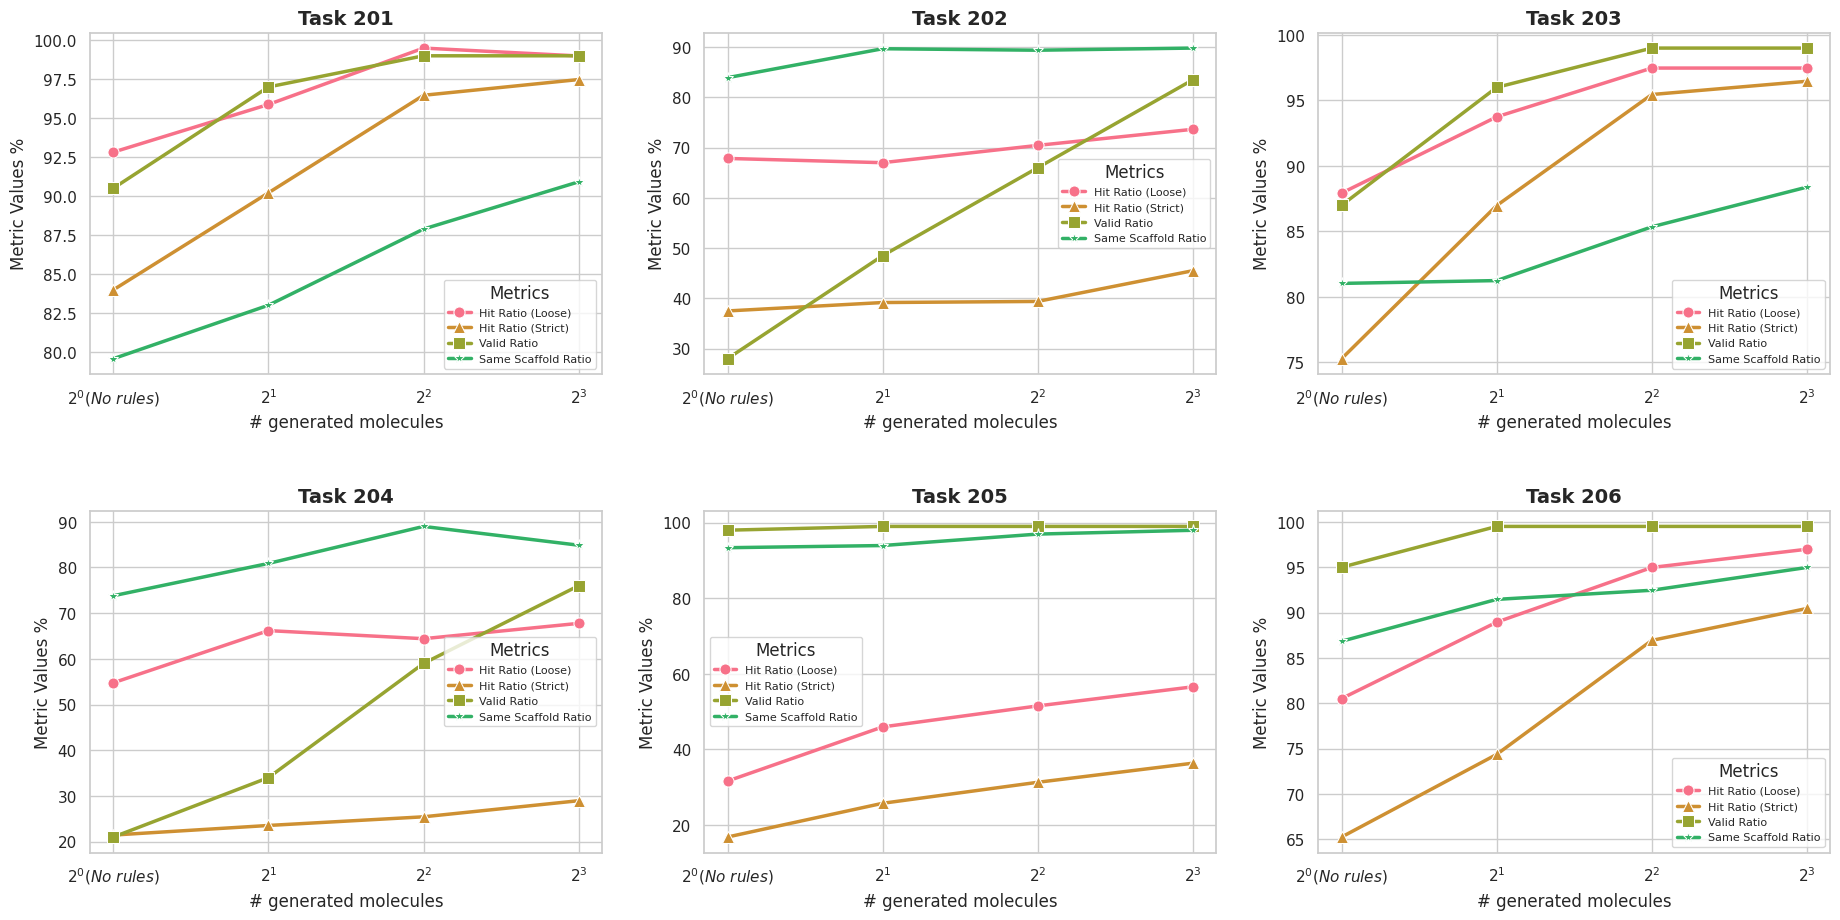

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
df = pd.read_csv('./data/rules_multi.csv')
# exclude_task_ids = ['101', '102', '103', '104', '105', '106', '107', '108']
# df = df[~df['task_id'].isin(exclude_task_ids)]

# 设置绘图风格
sns.set(style="whitegrid")

# 创建一个画布，包含多个子图
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# 设置颜色和标记样式
palette = sns.color_palette("husl", 8)
markers = ['o', '^', 's', '*', 'D', 'p', 'H', '+']  # 颜色标记

# 指标列表
df_metrics = ["Hit Ratio(loose)", "Hit Ratio(strict)", "Valid Ratio", "Same Scaffold Ratio"]
name_metrics = ["Hit Ratio (Loose)", "Hit Ratio (Strict)", "Valid Ratio", "Same Scaffold Ratio"]

# 对数刻度刻度标签
def log_tick_labels(x, pos):
    if x == 1:
        return r'$2^0 (No\ rules)$'
    elif x == 2:
        return r'$2^1$'
    elif x == 4:
        return r'$2^2$'
    elif x == 8:
        return r'$2^3$'
    

# 遍历每个task_id
for i, task_id in enumerate(df["task_id"].unique()):
    ax = axes[i // 3, i % 3]
    df_task = df[df["task_id"] == task_id]
    
    # 遍历每个指标并绘制线条
    for j, metric in enumerate(name_metrics):
        sns.lineplot(data=df_task, x="k", y=df_metrics[j], ax=ax, 
                     label=name_metrics[j], color=palette[j], 
                     linestyle='-', linewidth=2.5, 
                     marker=markers[j], markersize=8)
    
    ax.set_title(f'Task {task_id}', fontsize=14, weight='bold')
    
    # 设置对数刻度
    ax.set_xscale('log', base=2)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(log_tick_labels))
    
    ax.legend(title="Metrics", loc="best", fontsize=8, frameon=True)

for ax in axes.flat:
    # if ax.is_last_row():
        ax.set_xlabel('# generated molecules', fontsize=12)
    # else:
    #     ax.set_xlabel('')

# 统一Y轴标签
for ax in axes.flat:
    ax.set_ylabel('Metric Values %', fontsize=12)


# 调整布局和移除背景白边
plt.subplots_adjust(left=0.08, right=0.95, bottom=0.08, top=0.9, wspace=0.2, hspace=0.4)

# plt.savefig('./pdf/rules_multi.pdf')
plt.show()


### Functional group analysis

/tmp/ipykernel_694723/4086356330.py:395: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = ax.boxplot(score_diffs, labels=labels, patch_artist=True,
/tmp/ipykernel_694723/4086356330.py:395: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = ax.boxplot(score_diffs, labels=labels, patch_artist=True,
/tmp/ipykernel_694723/4086356330.py:395: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = ax.boxplot(score_diffs, labels=labels, patch_artist=True,
[07:51:03] WARNING: not removing hydrogen atom without neighbors
[07:51:03] WARNING: not removing hydrogen atom without neighbors
[07:51:03] WARNING: not 

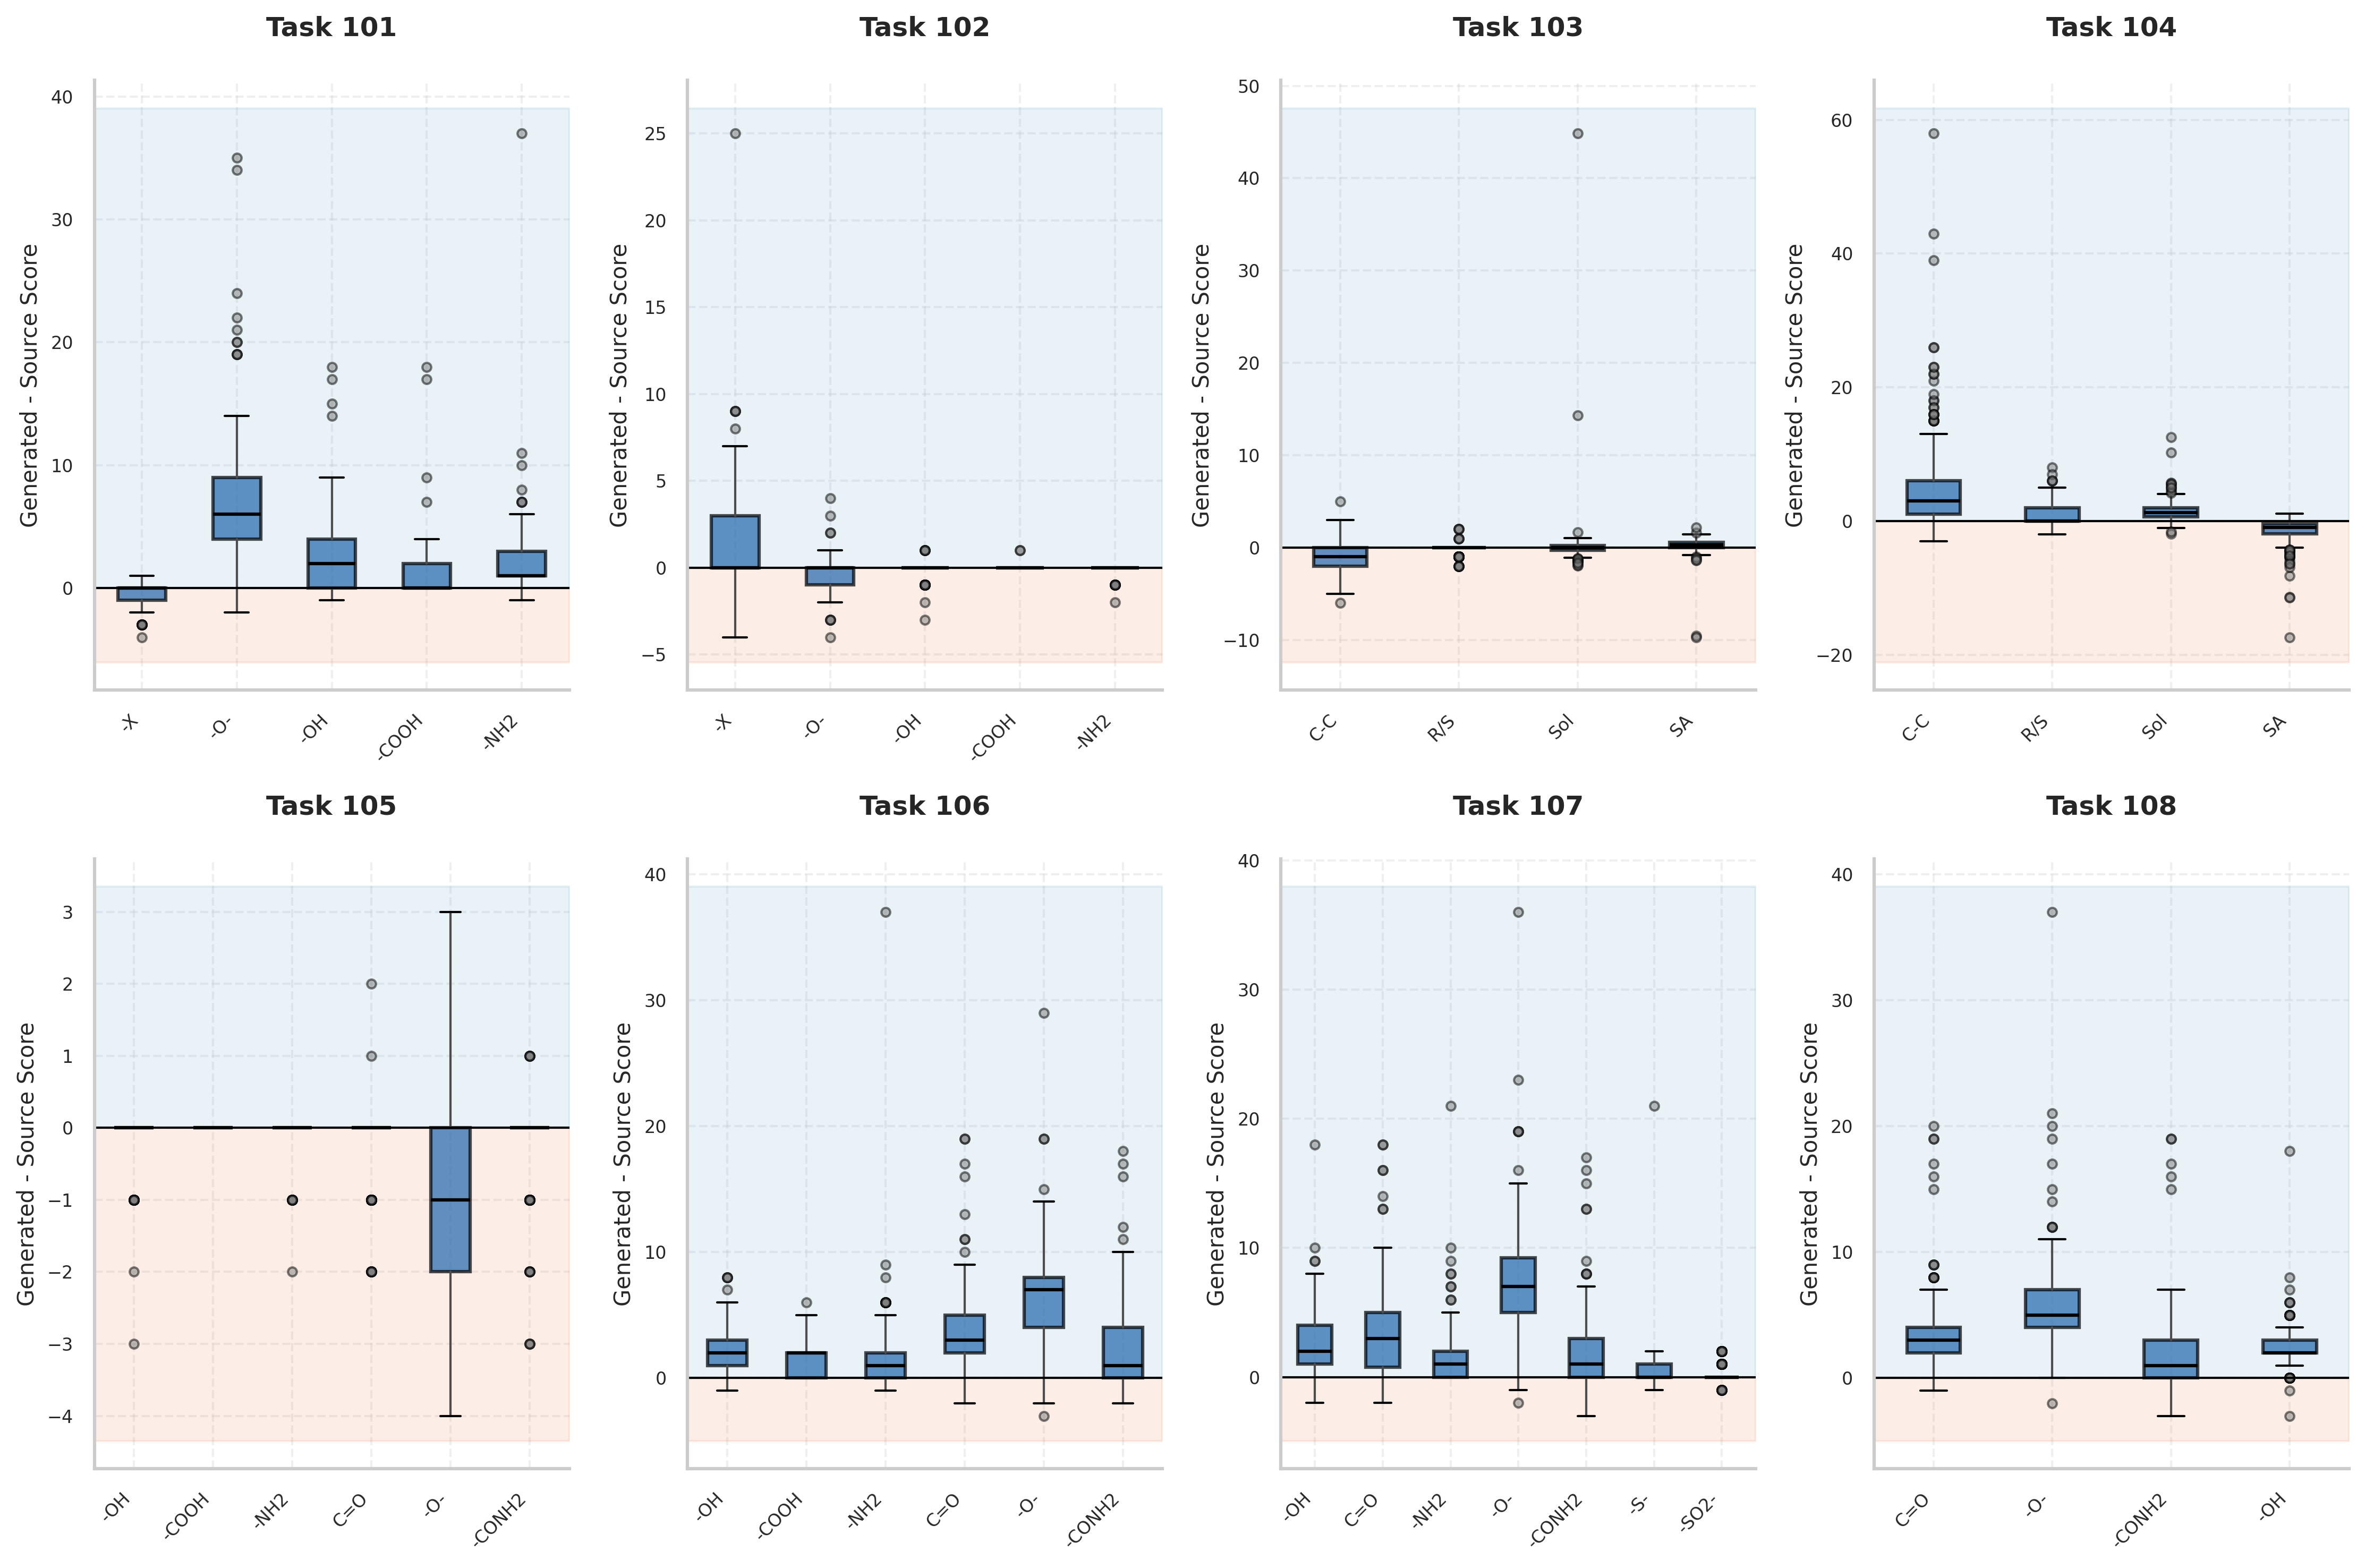

In [13]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors, Crippen
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

weight = json.load(open('./weight.wt', 'r'))

# 1. Molecular Weight (MW)
def calculate_molecular_weight(mol):
    if mol is None:
        return "Invalid SMILES string"
    return Descriptors.MolWt(mol)

# 2. Topological Polar Surface Area (TPSA)  
def calculate_tpsa(mol):
    if mol is None:
        return "Invalid SMILES string"
    return rdMolDescriptors.CalcTPSA(mol)

# 3. Hydrogen Bond Donors
def calculate_h_bond_donors(mol):
    if mol is None:
        return "Invalid SMILES string"
    return Descriptors.NumHDonors(mol)

# 4. Hydrogen Bond Acceptors
def calculate_h_bond_acceptors(mol):
    if mol is None:
        return "Invalid SMILES string"
    return Descriptors.NumHAcceptors(mol)

# 5. Polarizability (Approximated by MolMR)
def calculate_polarizability(mol):
    if mol is None:
        return "Invalid SMILES string"
    return Descriptors.MolMR(mol)

# 6. LogP (Partition Coefficient)
def calculate_logp(mol):
    if mol is None:
        return "Invalid SMILES string"
    return Crippen.MolLogP(mol)

# 7. Number of Rotatable Bonds
def calculate_num_rotatable_bonds(mol):
    if mol is None:
        return "Invalid SMILES string"
    return Descriptors.NumRotatableBonds(mol)

# 8. Formal Charge
def calculate_charge(mol):
    if mol is None:
        return "Invalid SMILES string"
    return Chem.GetFormalCharge(mol)

# 9. Stereochemistry (Chiral Centers)
def calculate_num_chiral_centers(mol):
    if mol is None:
        return "Invalid SMILES string"
    chiral_centers = Chem.FindMolChiralCenters(mol, includeUnassigned=True)
    return len(chiral_centers)

# 10. Solubility (Approximated by LogS using Crippen LogP)
def calculate_solubility(mol):
    if mol is None:
        return "Invalid SMILES string"
    logp = Crippen.MolLogP(mol)
    logS = 0.16 - 0.63 * logp  # Approximate formula for LogS
    return logS

# 11. Synthetic Accessibility (SA)
def calculate_synthetic_accessibility(mol):
    if mol is None:
        return "Invalid SMILES string"
    mw = Descriptors.MolWt(mol)
    num_rings = Chem.rdMolDescriptors.CalcNumRings(mol)
    return 10 - (0.01 * mw + 0.5 * num_rings)  # Simple SA approximation

# 12. Hydroxyl (-OH) Group
def calculate_num_hydroxyl_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    hydroxyl_pattern = Chem.MolFromSmarts('[OX2H]')
    return len(mol.GetSubstructMatches(hydroxyl_pattern))

# 13. Carboxyl (-COOH) Group
def calculate_num_carboxyl_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    carboxyl_pattern = Chem.MolFromSmarts('C(=O)[OH]')
    return len(mol.GetSubstructMatches(carboxyl_pattern))

# 14. Amino (-NH2) Group
def calculate_num_amino_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    amino_pattern = Chem.MolFromSmarts('[NX3H2]')
    return len(mol.GetSubstructMatches(amino_pattern))

# 15. Ether (R-O-R') Group
def calculate_num_ether_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    ether_pattern = Chem.MolFromSmarts('O')
    return len(mol.GetSubstructMatches(ether_pattern))

# 16. Phosphate (PO4) Group
def calculate_num_phosphate_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    phosphate_pattern = Chem.MolFromSmarts('P(=O)(O)(O)O')
    return len(mol.GetSubstructMatches(phosphate_pattern))

# 17. Amide (C(O)NH2) Group
def calculate_num_amide_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    amide_pattern = Chem.MolFromSmarts('C(=O)N')
    return len(mol.GetSubstructMatches(amide_pattern))

# 18. Nitrile (-C≡N) Group
def calculate_num_nitrile_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    nitrile_pattern = Chem.MolFromSmarts('C#N')
    return len(mol.GetSubstructMatches(nitrile_pattern))

# 19. Sulfonyl (SO2) Group
def calculate_num_sulfonyl_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    sulfonyl_pattern = Chem.MolFromSmarts('S(=O)(=O)')
    return len(mol.GetSubstructMatches(sulfonyl_pattern))

# 20. Nitro (-NO2) Group
def calculate_num_nitro_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    nitro_pattern = Chem.MolFromSmarts('N(=O)(=O)')
    return len(mol.GetSubstructMatches(nitro_pattern))

# 21. Thioether (R-S-R') Group
def calculate_num_thioether_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    thioether_pattern = Chem.MolFromSmarts('S')
    return len(mol.GetSubstructMatches(thioether_pattern))

# 22. Imidazole Ring (e.g., in Histidine)
def calculate_num_imidazole_rings(mol):
    if mol is None:
        return "Invalid SMILES string"
    imidazole_pattern = Chem.MolFromSmarts('n1cncc1')
    return len(mol.GetSubstructMatches(imidazole_pattern))

# 23. Carboxylate Ions (R-COO-)
def calculate_num_carboxylate_ions(mol):
    if mol is None:
        return "Invalid SMILES string"
    carboxylate_pattern = Chem.MolFromSmarts('C(=O)[O-]')
    return len(mol.GetSubstructMatches(carboxylate_pattern))

# 24. Number of Aromatic Rings
def calculate_num_aromatic_rings(mol):
    if mol is None:
        return "Invalid SMILES string"
    num_aromatic_rings = Chem.rdMolDescriptors.CalcNumAromaticRings(mol)
    return num_aromatic_rings

# 25. Presence of Halogens (F, Cl, Br, I)
def calculate_num_halogens(mol):
    if mol is None:
        return "Invalid SMILES string"
    halogen_smarts = Chem.MolFromSmarts('[F,Cl,Br,I]')
    num_halogens = len(mol.GetSubstructMatches(halogen_smarts))
    return num_halogens

# 26 Function to calculate the number of Carbonyl (C=O) groups
def calculate_num_carbonyl_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    carbonyl_pattern = Chem.MolFromSmarts('C=O')
    return len(mol.GetSubstructMatches(carbonyl_pattern))

# 27 Function to calculate the number of Sulfonamide (-SO2NH2) groups
def calculate_num_sulfonamide_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    sulfonamide_pattern = Chem.MolFromSmarts('S(=O)(=O)N')
    return len(mol.GetSubstructMatches(sulfonamide_pattern))

# 28 Function to calculate the number of Thiol (-SH) groups
def calculate_num_thiol_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    thiol_pattern = Chem.MolFromSmarts('[SH]')
    return len(mol.GetSubstructMatches(thiol_pattern))

# 29 Function to calculate the number of Aromatic Nitro (-NO2) groups
def calculate_num_aromatic_nitro_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    aromatic_nitro_pattern = Chem.MolFromSmarts('[$([NX3](=O)=O)]c')
    return len(mol.GetSubstructMatches(aromatic_nitro_pattern))

def logP_score(mol):
    hydroxyl_groups = calculate_num_hydroxyl_groups(mol)
    carboxyl_groups = calculate_num_carboxyl_groups(mol)
    amino_groups = calculate_num_amino_groups(mol)
    halogens = calculate_num_halogens(mol)  
    ether_groups = calculate_num_ether_groups(mol)
    return  halogens, ether_groups, hydroxyl_groups, carboxyl_groups, amino_groups

def qed_score(mol):
    mw = calculate_molecular_weight(mol)
    logp = calculate_logp(mol)
    tpsa = calculate_tpsa(mol)
    h_bond_donors = calculate_h_bond_donors(mol)
    h_bond_acceptors = calculate_h_bond_acceptors(mol)
    aromatic_rings = calculate_num_aromatic_rings(mol)
    rotatable_bonds = calculate_num_rotatable_bonds(mol)
    charge = calculate_charge(mol)
    stereochemistry = calculate_num_chiral_centers(mol)
    solubility = calculate_solubility(mol)
    sa = calculate_synthetic_accessibility(mol)
    
    return rotatable_bonds, stereochemistry, solubility, sa



def TPSA_score(mol):
    hydroxyl_groups = calculate_num_hydroxyl_groups(mol)
    carboxyl_groups = calculate_num_carboxyl_groups(mol)
    amino_groups = calculate_num_amino_groups(mol)
    carbonyl_groups = calculate_num_carbonyl_groups(mol)
    sulfonamide_groups = calculate_num_sulfonamide_groups(mol)
    ether_groups = calculate_num_ether_groups(mol)
    thiol_groups = calculate_num_thiol_groups(mol)
    phosphate_groups = calculate_num_phosphate_groups(mol)
    amide_groups = calculate_num_amide_groups(mol)
    nitro_groups = calculate_num_nitro_groups(mol)  
    return hydroxyl_groups, carboxyl_groups, amino_groups, carbonyl_groups, ether_groups, amide_groups



def HBA_score(mol):
    hydroxyl_groups = calculate_num_hydroxyl_groups(mol)
    carbonyl_groups = calculate_num_carbonyl_groups(mol)
    amino_groups = calculate_num_amino_groups(mol)
    ether_groups = calculate_num_ether_groups(mol)
    phosphate_groups = calculate_num_phosphate_groups(mol)
    carboxylate_groups = calculate_num_carboxylate_ions(mol)
    nitrile_groups = calculate_num_nitrile_groups(mol)
    amide_groups = calculate_num_amide_groups(mol)
    thioether_groups = calculate_num_thioether_groups(mol)
    sulfonyl_groups = calculate_num_sulfonyl_groups(mol)    
    return hydroxyl_groups, carbonyl_groups, amino_groups, ether_groups, amide_groups, thioether_groups, sulfonyl_groups


def HBD_score(mol):
    carbonyl_groups = calculate_num_carbonyl_groups(mol)    
    nitro_groups = calculate_num_nitro_groups(mol)
    ether_groups = calculate_num_ether_groups(mol)
    amide_groups = calculate_num_amide_groups(mol)
    aromatic_nitro_compounds = calculate_num_aromatic_nitro_groups(mol)
    sulfonyl_groups = calculate_num_sulfonyl_groups(mol)
    phosphoryl_groups = calculate_num_phosphate_groups(mol)
    hydroxyl_groups = calculate_num_hydroxyl_groups(mol)
    imidazole_rings = calculate_num_imidazole_rings(mol)
    carboxylate_ions = calculate_num_carboxylate_ions(mol)      
    return carbonyl_groups, ether_groups, amide_groups, hydroxyl_groups


def mix_score(mol, task_id):
    if task_id in ['201', '202']:
        if task_id == '201':
            score = -logP_score(mol) + HBA_score(mol)
        else:
            score = logP_score(mol) + HBA_score(mol)
    elif task_id in ['203', '204']:
        if task_id == '203':
            score = -logP_score(mol) + HBD_score(mol)
        else:
            score = logP_score(mol) + HBD_score(mol) 
    elif task_id in ['205', '206']:
        if task_id == '205':
            score = - TPSA_score(mol) + logP_score(mol)
        else:
            score =  TPSA_score(mol) - logP_score(mol) 
    else:
        raise ValueError(f"未知的任务ID: {task_id}")
    return score

def calculate_scores(smiles_list, task_id):
    scores_dict = {}
    
    for smiles in smiles_list:
        # Convert float to string if needed
        if isinstance(smiles, float):
            continue
            
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            continue
            
        if task_id in ['101', '102']:
            score = logP_score(mol)  
        elif task_id in ['103', '104']:
            score = qed_score(mol)
        elif task_id in ['105', '106']:
            score = TPSA_score(mol)
        elif task_id == '107':
            score = HBA_score(mol)
        elif task_id == '108':
            score = HBD_score(mol)
        elif task_id in ['201', '202', '203', '204', '205', '206']:
            score = mix_score(mol, task_id)
        elif task_id == '301':
            score = qed_score(mol)
        elif task_id in ['109', '110']:
            score = TPSA_score(mol)
        else:
            raise ValueError(f"未知的任务ID: {task_id}")
        
        scores_dict[smiles] = score

    return scores_dict

def visualize_task_comparison():
    task_ids = ['101', '102', '103', '104', '105', '106', '107', '108']
    
    task_id_labels = {
        '101': ['-X', '-O-', '-OH', '-COOH', '-NH2'],
        '102': ['-X', '-O-', '-OH', '-COOH', '-NH2'], 
        '103': ['C-C', 'R/S', 'Sol', 'SA'],
        '104': ['C-C', 'R/S', 'Sol', 'SA'],
        '105': ['-OH', '-COOH', '-NH2', 'C=O', '-O-', '-CONH2'],
        '106': ['-OH', '-COOH', '-NH2', 'C=O', '-O-', '-CONH2'],
        '107': ['-OH', 'C=O', '-NH2', '-O-', '-CONH2', '-S-', '-SO2-'],
        '108': ['C=O', '-O-', '-CONH2', '-OH'],
    }

    n_rows = (len(task_ids) + 2) // 4
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5*n_rows), dpi=300)
    axes = axes.flatten()
    
    # Nature风格的配色方案
    colors = {
        'box_face': '#2166AC',     # 箱线图填充色
        'median': '#000000',       # 中位线颜色
        'whisker': '#4D4D4D',      # 须线颜色
        'positive_area': '#67A9CF', # 正区域填充色
        'negative_area': '#EF8A62', # 负区域填充色
        'grid': '#CCCCCC',         # 网格线颜色
        'zero_line': '#000000'     # 零线颜色
    }
    
    # plt.style.use('seaborn-whitegrid')
    
    for idx, task_id in enumerate(task_ids):
        df = pd.read_csv('/inspire/hdd/ws-f4d69b29-e0a5-44e6-bd92-acf4de9990f0/public-project/yujiajun-240108120114/llm4drug/output/base_galactica30b_mol_{}x_16_scaffold.csv'.format(task_id))
        source_scores = calculate_scores(df['mol'].tolist(), task_id)
        generated_scores = calculate_scores(df['gene_mol'].tolist(), task_id)
        
        if source_scores and generated_scores:
            source_values = np.array(list(source_scores.values()))
            generated_values = np.array(list(generated_scores.values()))
            
            score_diffs = []
            labels = []
            
            n_dimensions = len(source_values[0]) if isinstance(source_values[0], (list, tuple, np.ndarray)) else 1
            
            for dim in range(n_dimensions):
                if n_dimensions > 1:
                    dim_source = source_values[:, dim]
                    dim_generated = generated_values[:, dim]
                else:
                    dim_source = source_values
                    dim_generated = generated_values
                
                min_len = min(len(dim_source), len(dim_generated))
                dim_source = dim_source[:min_len]
                dim_generated = dim_generated[:min_len]
                
                diff = dim_generated - dim_source
                score_diffs.append(diff)
                labels.append(task_id_labels[task_id][dim])
            
            ax = axes[idx]
            
            # 绘制箱线图
            box_parts = ax.boxplot(score_diffs, labels=labels, patch_artist=True,
                                 medianprops=dict(color=colors['median'], linewidth=1.5),
                                 whiskerprops=dict(color=colors['whisker']),
                                 flierprops=dict(marker='o', markerfacecolor='gray',
                                               markersize=4, alpha=0.5))
            
            # 添加零线
            ax.axhline(y=0, color=colors['zero_line'], linestyle='-', linewidth=1)
            
            # 填充正负区域
            ymin, ymax = ax.get_ylim()
            ax.fill_between(ax.get_xlim(), 0, ymin, alpha=0.15, color=colors['negative_area'])
            ax.fill_between(ax.get_xlim(), 0, ymax, alpha=0.15, color=colors['positive_area'])
            
            # 设置箱线图颜色
            for box in box_parts['boxes']:
                box.set_facecolor(colors['box_face'])
                box.set_alpha(0.7)
                box.set_linewidth(1.5)
            
            ax.set_xticklabels(labels, rotation=45, ha='right')
            ax.set_title(f'Task {task_id}', pad=20, fontsize=12, fontweight='bold')
            ax.set_ylabel('Generated - Source Score', fontsize=10)
            ax.tick_params(axis='both', which='major', labelsize=8)
            
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_linewidth(1.5)
            ax.spines['bottom'].set_linewidth(1.5)
            ax.grid(True, linestyle='--', alpha=0.3, color=colors['grid'])
    
    for idx in range(len(task_ids), len(axes)):
        fig.delaxes(axes[idx])
        
    plt.tight_layout()
    plt.show()
visualize_task_comparison()

### Molecule Direction

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

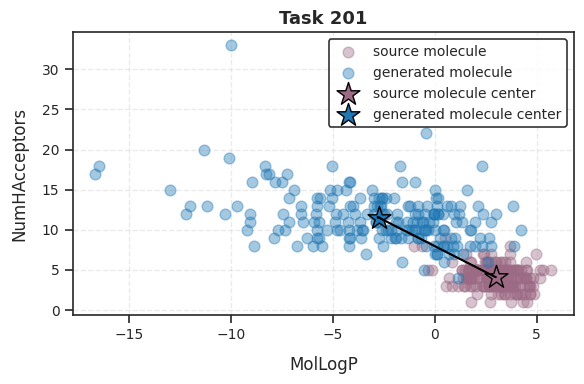

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

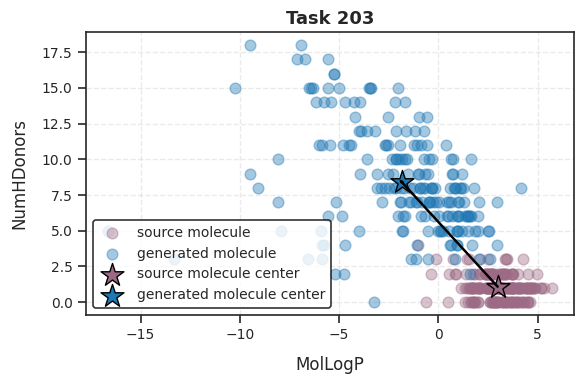

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

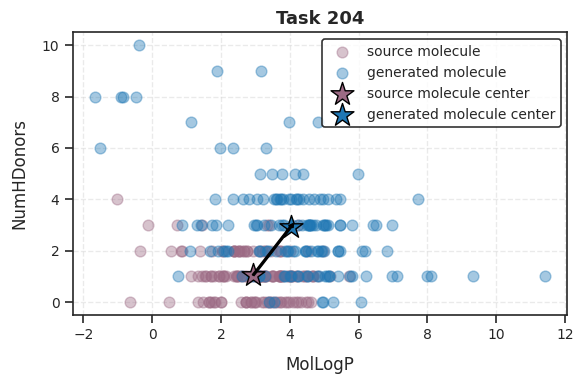

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

task_list = {
    "201": ["MolLogP", "NumHAcceptors"], "202": ["MolLogP", "NumHAcceptors"],
    "203": ["MolLogP", "NumHDonors"], "204": ["MolLogP", "NumHDonors"], 
    "205": ["MolLogP", "TPSA"], "206": ["MolLogP", "TPSA"]
}

# Set the style to match Nature publication standards
# plt.style.use('seaborn-whitegrid')
sns.set_style("ticks")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2

# Create a figure with 2x3 subplots
# fig, axes = plt.subplots(2, 3, figsize=(20, 10))
# axes = axes.ravel()

np.random.seed(42)

for idx, task_id in enumerate(['201','202','203','204','205','206']):
    plt.figure(figsize=(6,4))
    df = pd.read_csv('./data/base_galactica30b_base_{}_16_scaffold.csv'.format(task_id))
    x_prop = task_list[task_id][0]
    y_prop = task_list[task_id][1]
    df = df[df['gene_'+x_prop]!=-999]
    df = df[df['gene_'+y_prop]!=-999]
    df = df[df[x_prop]!=-999]
    df = df[df[y_prop]!=-999]
    x1 = df[x_prop].values.tolist()
    y1 = df[y_prop].values.tolist()
    x2 = df['gene_'+x_prop].values.tolist()
    y2 = df['gene_'+y_prop].values.tolist()

    # Calculate centers
    center1_x = np.mean(x1)
    center1_y = np.mean(y1)
    center2_x = np.mean(x2)
    center2_y = np.mean(y2)

    # Plot on the corresponding subplot
    ax = plt.gca()
    
    # Plot the scatter points
    scatter1 = ax.scatter(x1, y1, c='#9c6a84', alpha=0.4, s=60, label='source molecule')
    scatter2 = ax.scatter(x2, y2, c='#1f77b4', alpha=0.4, s=60, label='generated molecule')

    # Plot centers with larger stars
    ax.scatter(center1_x, center1_y, c='#9c6a84', s=300, marker='*', label='source molecule center',
              linewidth=1, edgecolor='black')
    ax.scatter(center2_x, center2_y, c='#1f77b4', s=300, marker='*', label='generated molecule center',
              linewidth=1, edgecolor='black')
    ax.set_title('Task '+task_id, fontsize=13, fontweight='bold')
    # Draw arrow between centers
    ax.arrow(center1_x, center1_y, center2_x-center1_x, center2_y-center1_y,
             head_width=0.15, head_length=0.15, fc='black', ec='black',
             width=0.06)

    ax.set_xlabel(x_prop, fontsize=12, labelpad=10)
    ax.set_ylabel(y_prop, fontsize=12, labelpad=10)
    ax.tick_params(axis='both', which='major', labelsize=10, width=1.2)
    
    legend = ax.legend(frameon=True, fontsize=10, markerscale=1)
    legend.get_frame().set_linewidth(1.2)
    legend.get_frame().set_edgecolor('black')
    
    ax.grid(True, linestyle='--', alpha=0.4, linewidth=1.0)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)

    # Adjust layout
    plt.tight_layout()

    # Save combined figure as PDF
    # plt.savefig('./svg/{}_scatter.svg'.format(task_id), bbox_inches='tight')
    plt.show()


### baseline 对比 （RADAR）

In [23]:
import pandas as pd
# df = pd.read_csv('./data/radar_single.csv')
df = pd.read_csv('./data/size_single.csv')
df = df[df['model_size'] == '6.7b']
df.describe()

task_id  Valid Ratio  Hit Ratio(loose)  Hit Ratio(strict)  \
count    8.00000     8.000000          8.000000           8.000000   
mean   104.50000    99.000000         88.409762          77.152738   
std      2.44949     0.707107         16.621161          30.341500   
min    101.00000    98.000000         61.421300          15.151500   
25%    102.75000    98.500000         85.581050          75.507625   
50%    104.50000    99.000000         96.177400          87.811800   
75%    106.25000    99.250000         98.989900          97.731025   
max    108.00000   100.000000        100.000000          99.000000   

       Same Scaffold Ratio  
count             8.000000  
mean             95.059688  
std               2.077921  
min              90.862900  
25%              94.570700  
50%              95.431350  
75%              96.446700  
max              97.474700

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
from scipy.interpolate import make_interp_spline

# Load single data
data = pd.DataFrame({
    'model': ['MultiMol', 'GS-Mutate', 'High Variance', 'MoleculeSTM', 'PCA', 'Random', 'w/o fine-tune'],
    'Valid Ratio': [99.00, 100, 91, 84.0625, 91.0, 96.5, 88.0],
    'Hit Ratio(loose)': [88.409762, 36.0625, 7.4875, 47.89, 7.2825, 4.9875, 36.0525],
    'Hit Ratio(strict)': [77.152728, 10.125, 2.33625, 29.35875, 1.925, 1.62, 17.78125],
    'Same Scaffold Ratio': [95.059688, 44.0, 78.02, 58.65625, 79.67, 81.87, 50.21375]
})

# Load multiple data
# data = pd.DataFrame({
#     'model': ['MultiMol', 'GS-Mutate', 'High Variance', 'MoleculeSTM', 'PCA', 'Random', 'w/o fine-tune'],
#     'Valid Ratio': [97.416667, 100, 91, 80.41666667, 91, 96.5, 88],
#     'Hit Ratio(loose)': [79.7221, 11.5, 1.923333333, 27.5, 1.191666667, 0.691666667, 10.7],
#     'Hit Ratio(strict)': [65.222017, 1.333333333, 0.55, 12.02, 0.275, 0.173333333, 2.991666667],
#     'Same Scaffold Ratio': [95.62455, 44, 78.02, 58.03833333, 79.67, 81.87, 49.46666667]
# })



# Set style to white background
# plt.style.use('seaborn-white')

# Set number of variables
categories = list(data.columns[1:])
N = len(categories)

# Define angles for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialize radar chart with higher DPI and specific figure size
fig, ax = plt.subplots(figsize=(8, 8), dpi=300, subplot_kw=dict(polar=True))

# Define professional color palette (Nature style)
color_mapping = {
    'MultiMol': '#2166AC',        # Deep blue
    'MoleculeSTM': '#B2182B',     # Deep red
    'GS-Mutate': '#4393C3',       # Medium blue
    'High Variance': '#D6604D',    # Medium red
    'PCA': '#92C5DE',             # Light blue
    'Random': '#F4A582',          # Light red
    'w/o fine-tune': '#808080'    # Grey
}

for i, row in data.iterrows():
    values = row.drop('model').values.flatten().tolist()
    values += values[:1]
    
    ax.plot(angles, values, label=row['model'], linewidth=1.5, 
            color=color_mapping[row['model']], alpha=1.0)
    ax.fill(angles, values, alpha=0.15, color=color_mapping[row['model']])

# Customize the chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)

# Set y-axis ticks and labels
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_yticklabels(['0', '20', '40', '60', '80', '100'], 
                   fontsize=8, color='#333333')

# Add gridlines with higher visibility
ax.grid(True, color='#999999', alpha=0.5, linewidth=0.8)

# Remove axis lines
ax.spines['polar'].set_visible(False)

# Customize legend
legend = plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5),
                   frameon=False, fontsize=9)
for line in legend.get_lines():
    line.set_linewidth(2)

# Adjust layout
plt.tight_layout()

# Save with high DPI
# plt.savefig('./svg/radar_multi2.svg', dpi=300, bbox_inches='tight')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

### Different Model Size

<Figure size 1200x600 with 0 Axes>

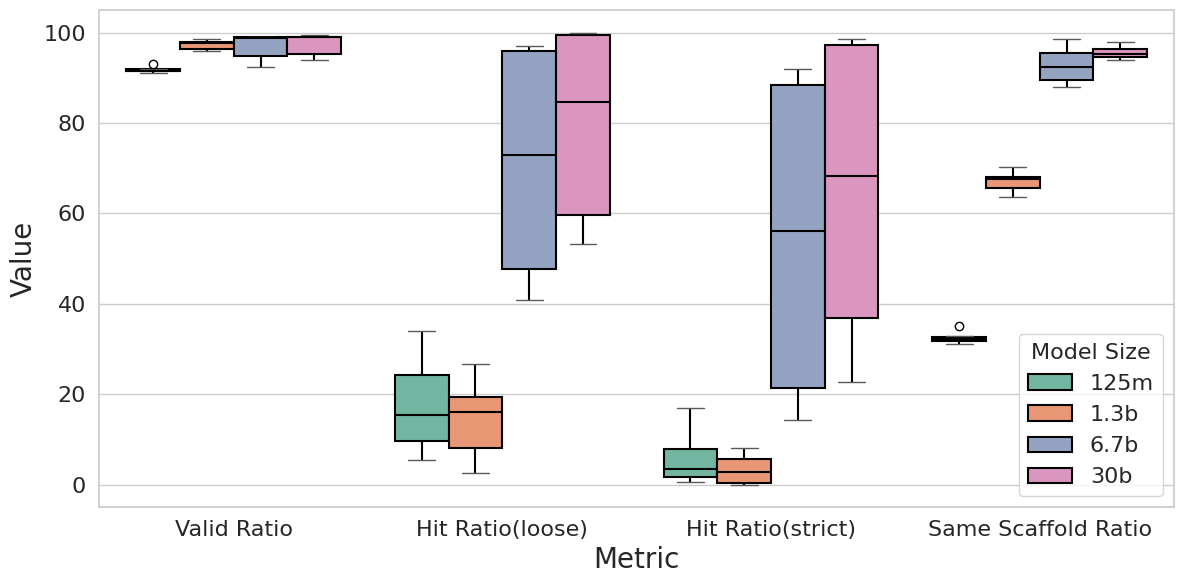

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('./data/size_multi.csv')
# 数据转换
df_melted = df.melt(id_vars=['model_size', 'task_id'], 
                    value_vars=['Valid Ratio',  'Hit Ratio(loose)','Hit Ratio(strict)','Same Scaffold Ratio'],
                    var_name='metric', value_name='value')

# 设置绘图风格
sns.set(style="whitegrid")
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))

# 创建图形
plt.figure(figsize=(12, 6))

# 设置绘图风格
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(12, 6))

# 获取颜色调色板
palette = sns.color_palette("Set2", n_colors=len(df['model_size'].unique()))

# 绘制箱型图，使用指定的颜色和加粗的轮廓
sns.boxplot(data=df_melted, x='metric', y='value', hue='model_size', 
            palette=palette, dodge=True, 
            boxprops=dict(linewidth=1.5, edgecolor='black'),  # 加粗箱子的外轮廓为黑色
            medianprops=dict(linewidth=1.5, color='black'),  # 中位线为黑色
            whiskerprops=dict(linewidth=1.5, color='black'),  # 须线为黑色
            flierprops=dict(markeredgecolor='black', linewidth=2))  # 加粗异常值的轮廓为黑色

# 设置标题和标签
# plt.title('Comparison of Model Sizes Across Different Metrics', fontsize=16)
plt.xlabel('Metric', fontsize=20)
plt.ylabel('Value', fontsize=20)
plt.legend(title='Model Size', fontsize=16, title_fontsize='16')
plt.tick_params(axis='both', which='major', labelsize=16)
# 保存图像
plt.tight_layout()
# plt.savefig(f'./svg/model_size_multi.svg', format='svg', bbox_inches='tight')
# plt.savefig('model_size_comparison_boxplot.png', dpi=300)
plt.show()


### Regression

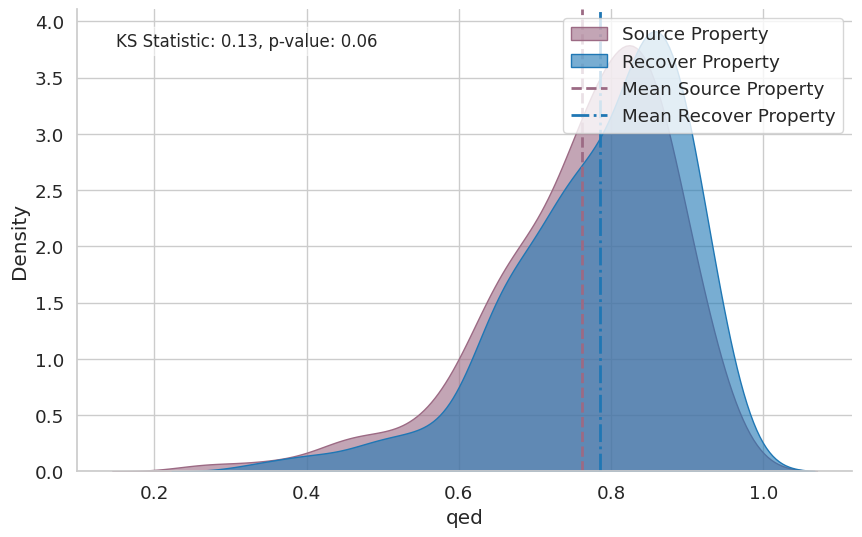

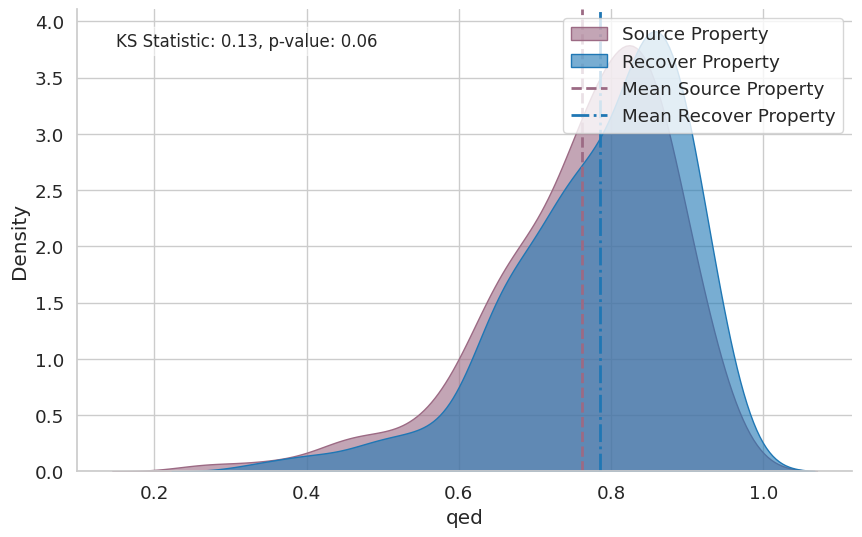

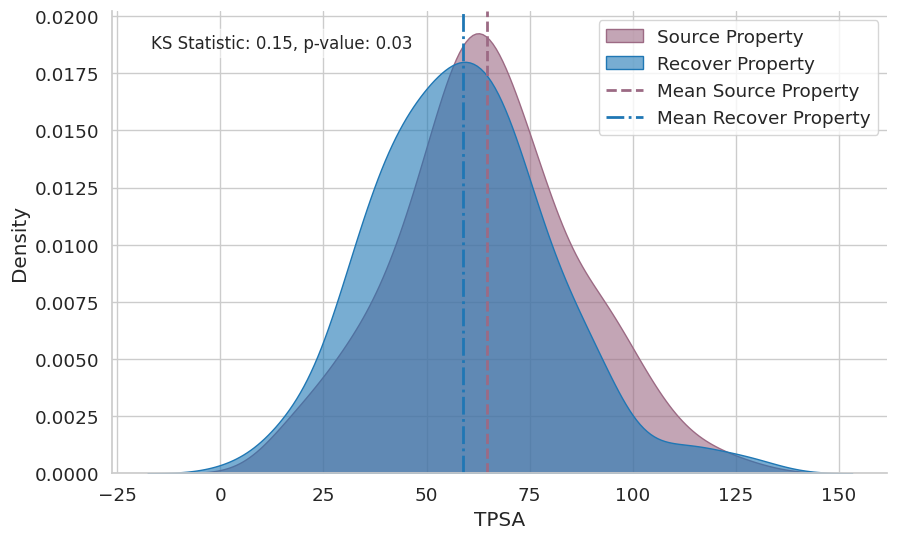

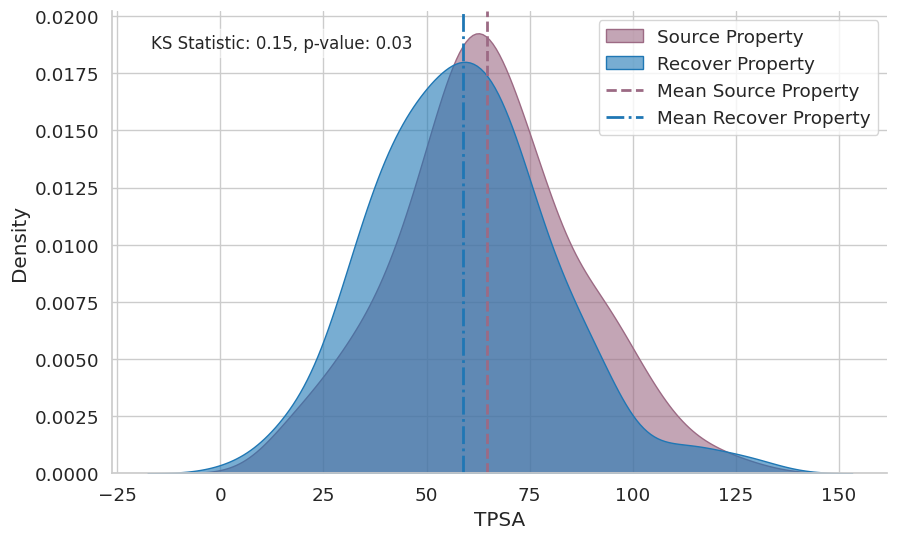

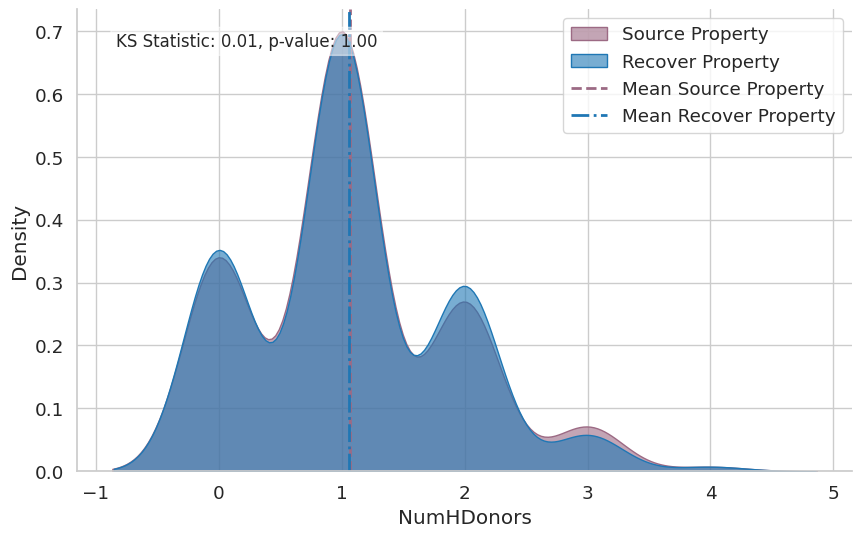

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Your provided data (synthetic example to match a larger dataset)
task_id_map = {
    "101": ["MolLogP"], "102": ["MolLogP"], "103": ["qed"], "104": ["qed"], 
    "105": ["TPSA"], "106": ["TPSA"], "107": ["NumHAcceptors"], "108": ["NumHDonors"]
    }

for task_id in ['101', '102', '103', '104', '105', '106', '107', '108']:
    df = pd.read_csv(f'./data/regression_{task_id}x.csv')
    prop = task_id_map[task_id][0]
    df = df[df[f'gene_{prop}']!=-999]

    group1 = df[f'{prop}'].tolist()
    group2 = df[f'gene_{prop}'].tolist()

    sns.set(style="whitegrid", font_scale=1.2)

    # Use a more refined and natural color palette
    palette = ['#9c6a84', '#1f77b4']  # A combination of soft green and muted pink
    # Create the figure and axis
    plt.figure(figsize=(10, 6))

    # Plot the KDE for each group with transparency
    sns.kdeplot(group1, color=palette[0], fill=True, alpha=0.6, label="Source Property")
    sns.kdeplot(group2, color=palette[1], fill=True, alpha=0.6, label="Recover Property")

    # Calculate and plot the mean lines for each group
    mean_group1 = np.mean(group1)
    mean_group2 = np.mean(group2)

    plt.axvline(mean_group1, color=palette[0], linestyle='--', linewidth=2, label='Mean Source Property')
    plt.axvline(mean_group2, color=palette[1], linestyle='-.', linewidth=2, label='Mean Recover Property')

    # Calculate the KS statistic to quantify the difference between distributions
    ks_stat, p_value = ks_2samp(group1, group2)

    # Add KS statistic to the plot
    plt.text(0.05, 0.95, f'KS Statistic: {ks_stat:.2f}, p-value: {p_value:.2f}',  transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    # Add labels and legend
    plt.xlabel(f"{prop}")
    plt.ylabel("Density")
    plt.legend(loc='upper right')

    # Remove the top and right spines for a cleaner look
    sns.despine()

    # Show the plot
    # plt.savefig(f'./regression_{task_id}.pdf', bbox_inches='tight')
    plt.show()


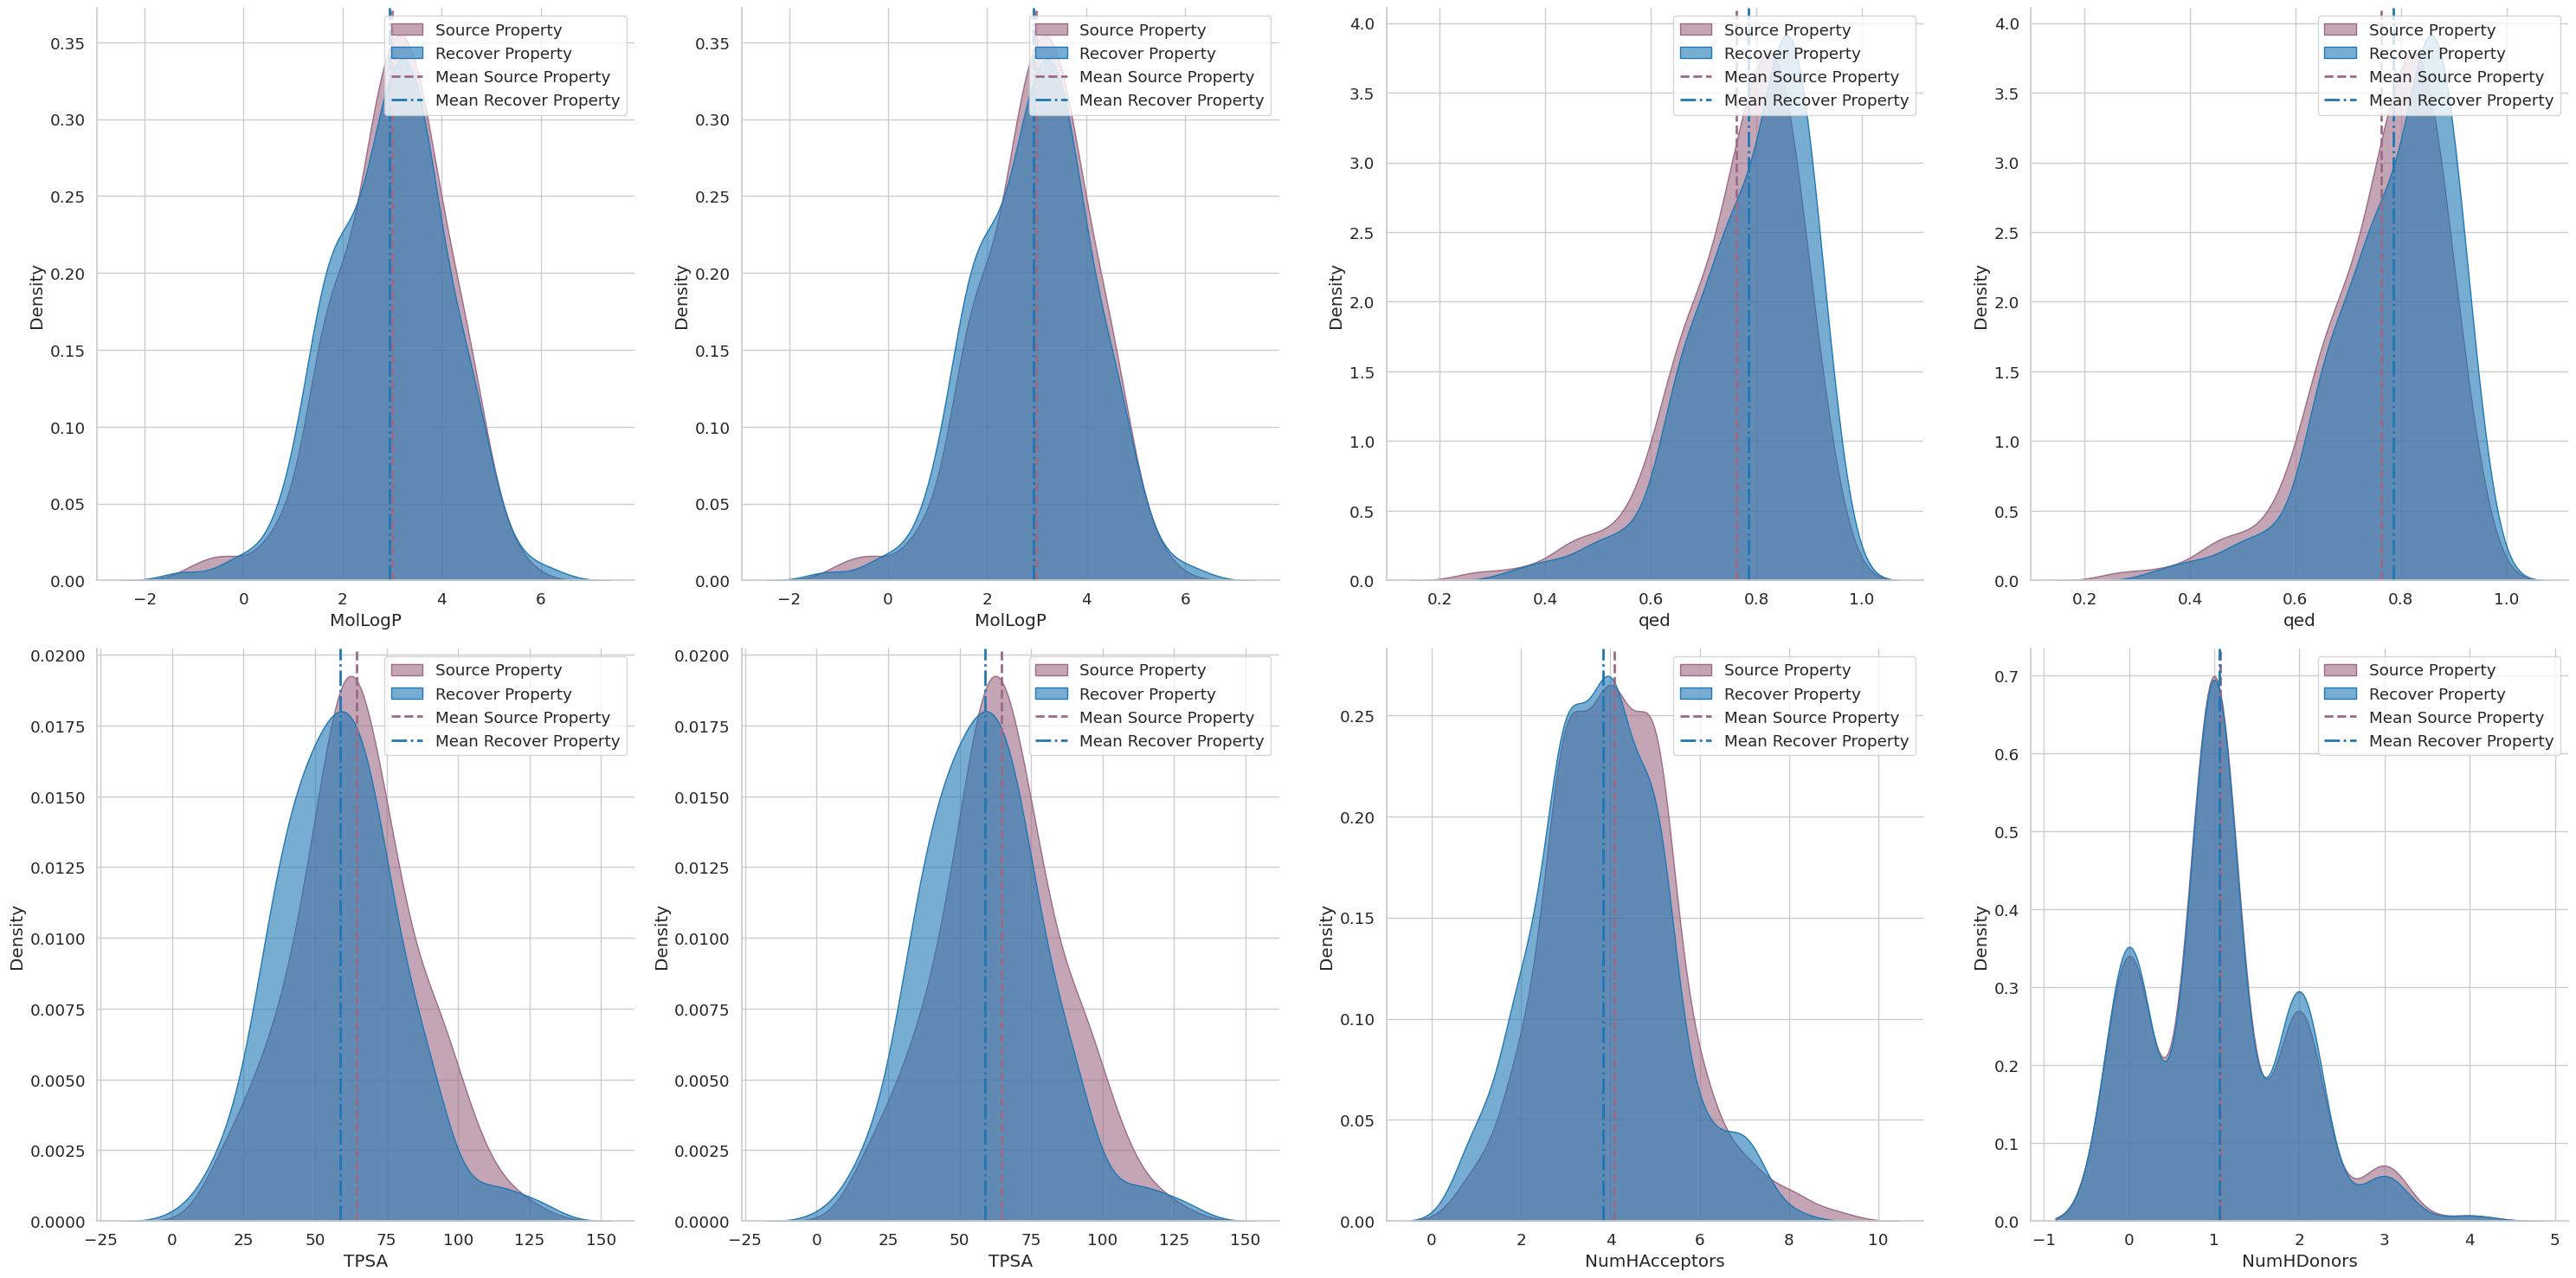

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your provided data (synthetic example to match a larger dataset)
task_id_map = {
    "101": ["MolLogP"], "102": ["MolLogP"], "103": ["qed"], "104": ["qed"], 
    "105": ["TPSA"], "106": ["TPSA"], "107": ["NumHAcceptors"], "108": ["NumHDonors"]
}

# Set up the overall figure with 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(30, 15))
axes = axes.flatten()

# Iterate through each task and create a subplot
for idx, task_id in enumerate(['101', '102', '103', '104', '105', '106', '107', '108']):
    # df = pd.read_csv(f'./data/base_galactica30b_base_{task_id}x_16_scaffold.csv')
    df = pd.read_csv(f'./data/regression_{task_id}x.csv')
    prop = task_id_map[task_id][0]
    df = df[df[f'gene_{prop}'] != -999]
    df = df[df[f'{prop}'] != -999]
    

    group1 = df[f'{prop}'].tolist()
    group2 = df[f'gene_{prop}'].tolist()

    sns.set(style="whitegrid", font_scale=1.2)

    # Use a more refined and natural color palette
    palette = ['#9c6a84', '#1f77b4']   # A combination of soft green and muted pink

    # Plot the KDE for each group with transparency on the corresponding axis
    sns.kdeplot(group1, color=palette[0], fill=True, alpha=0.6, label="Source Property", ax=axes[idx])
    sns.kdeplot(group2, color=palette[1], fill=True, alpha=0.6, label="Recover Property", ax=axes[idx])

    # Calculate and plot the mean lines for each group
    mean_group1 = np.mean(group1)
    mean_group2 = np.mean(group2)

    axes[idx].axvline(mean_group1, color=palette[0], linestyle='--', linewidth=2, label='Mean Source Property')
    axes[idx].axvline(mean_group2, color=palette[1], linestyle='-.', linewidth=2, label='Mean Recover Property')

    # Add labels and legend
    axes[idx].set_xlabel(f"{prop}")
    axes[idx].set_ylabel("Density")
    axes[idx].legend(loc='upper right')

    # Remove the top and right spines for a cleaner look
    sns.despine()

# Adjust layout to prevent overlap and save the final figure
plt.tight_layout()
# plt.savefig('./svg/regression_combined.svg', bbox_inches='tight')
# plt.savefig('./pdf/regression_combined.pdf', bbox_inches='tight')

plt.show()


### Auxiliary property

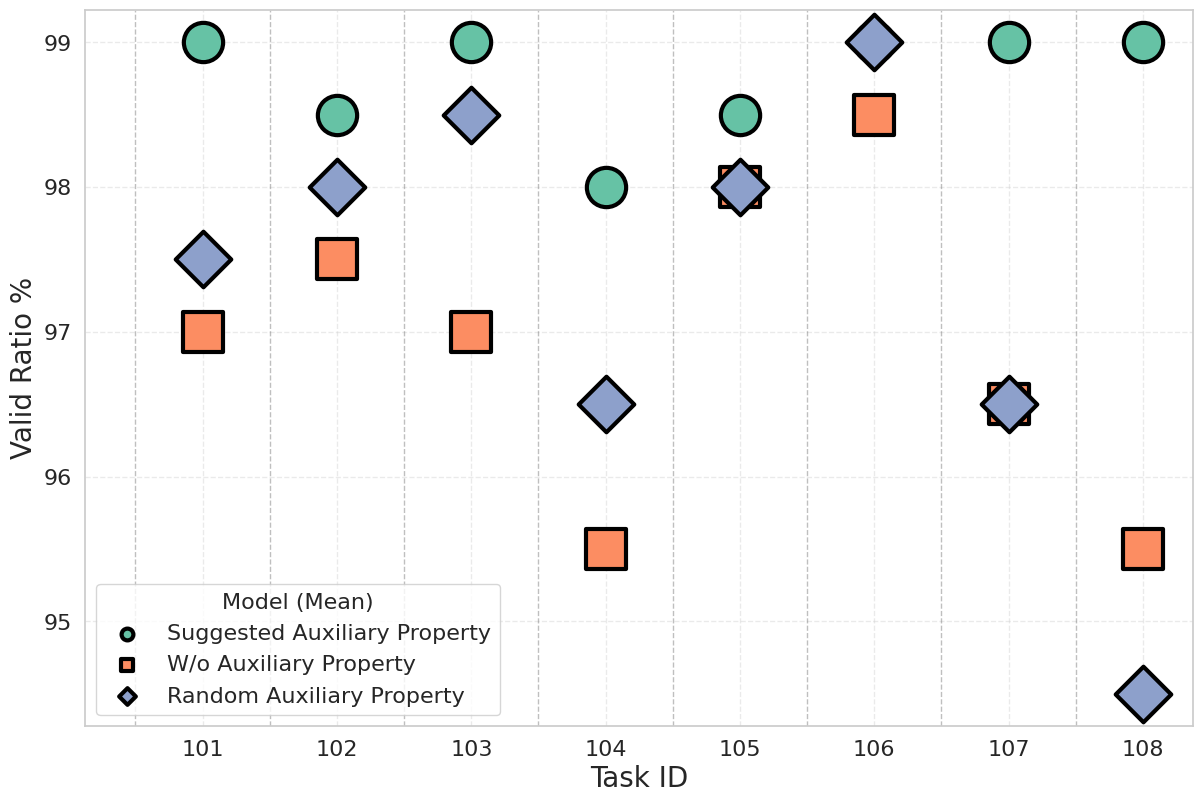

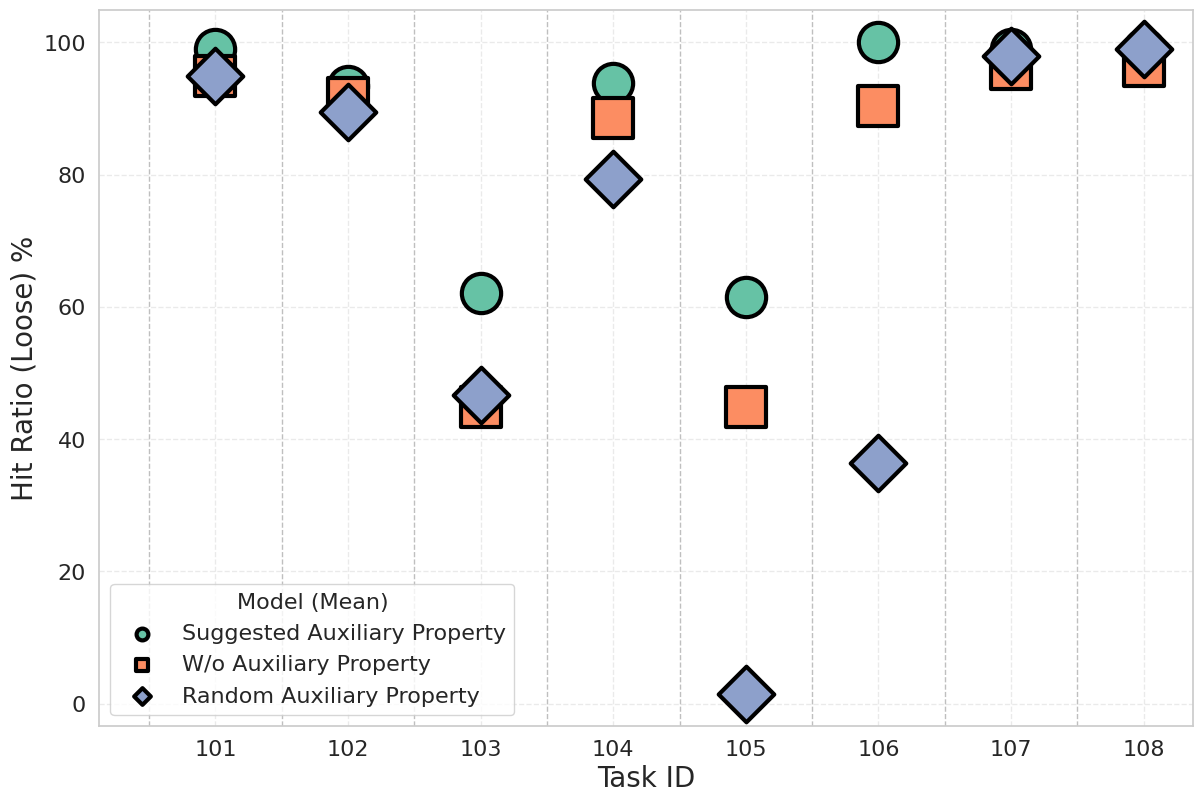

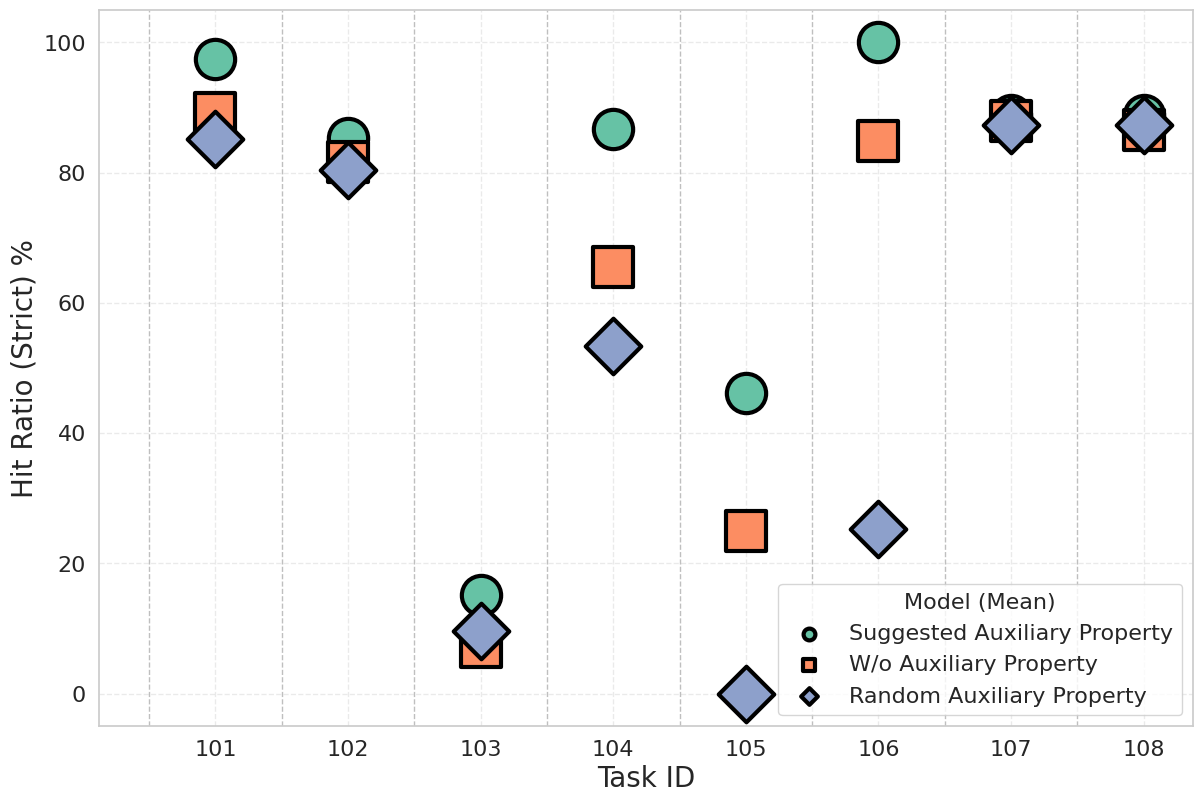

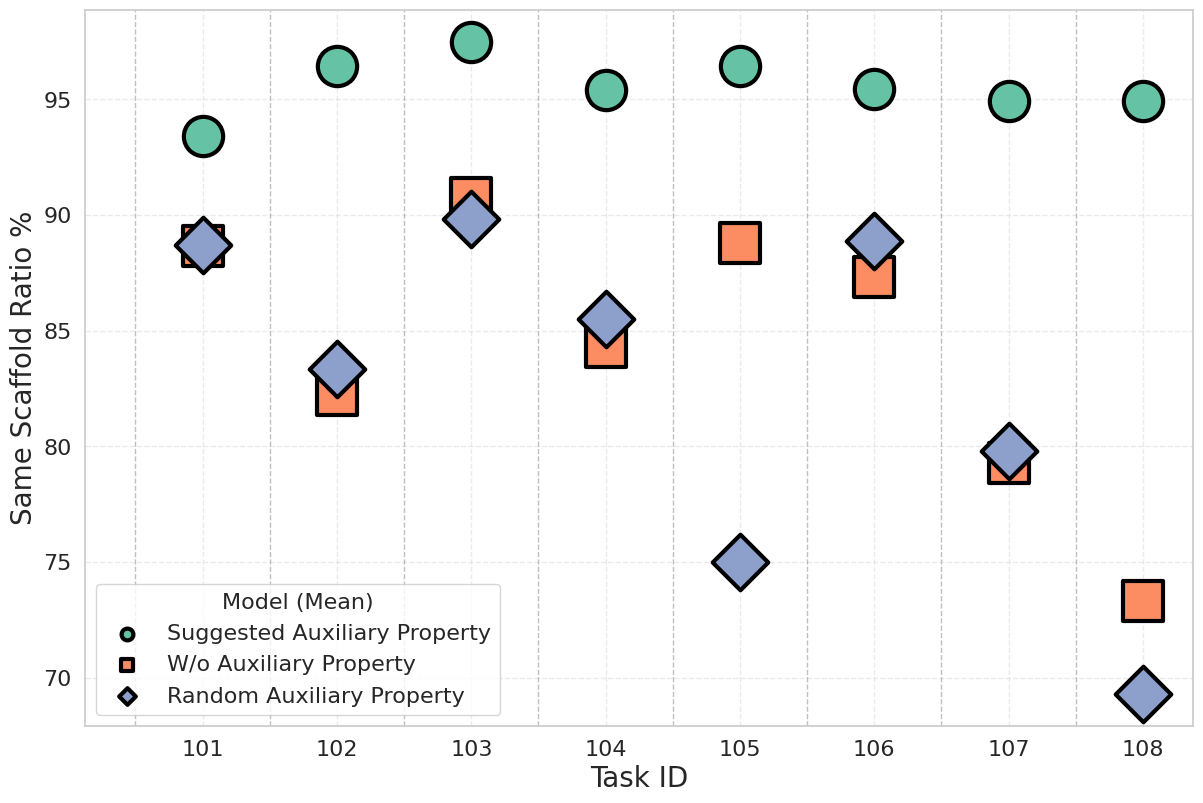

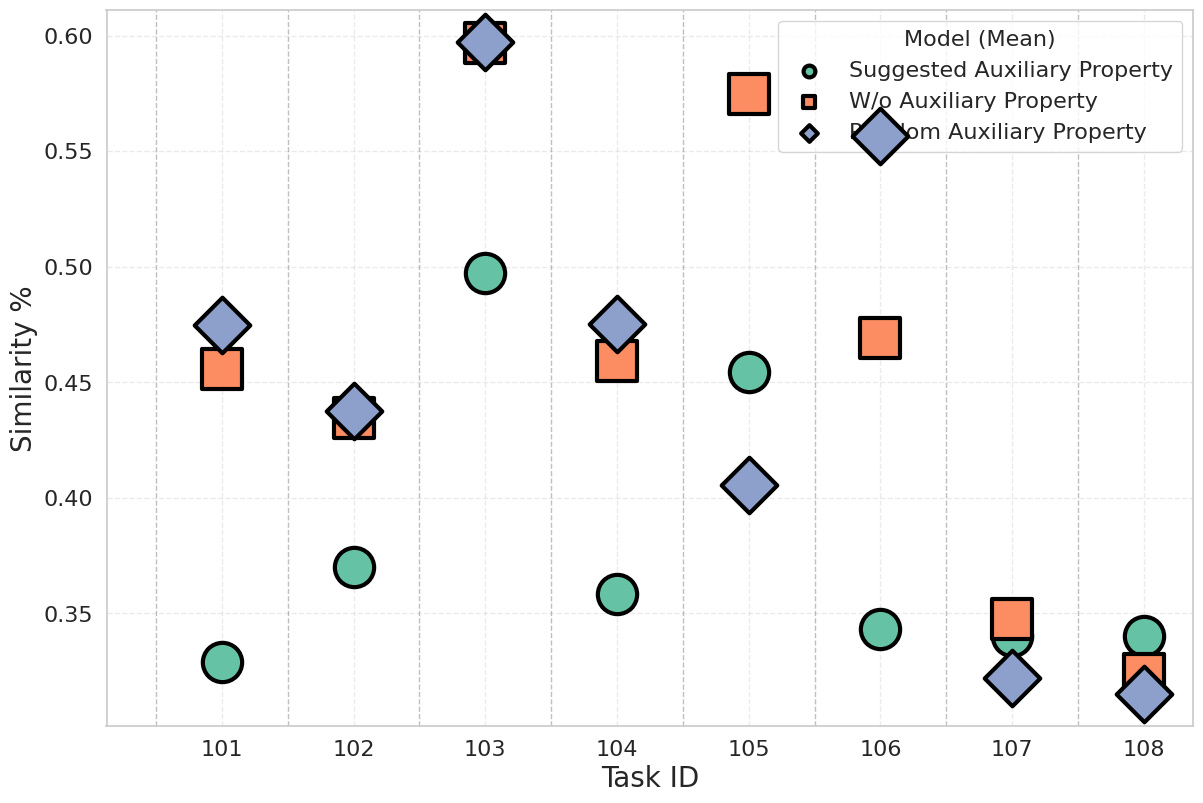

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm

# Load data from CSV
data = pd.read_csv('./data/auxiliary.csv')

# Set style to a nature-like aesthetic
sns.set(style="whitegrid")

# Define the metrics to plot
metrics = ['Valid Ratio', 'Hit Ratio (Loose)', 'Hit Ratio (Strict)', 'Same Scaffold Ratio', 'Similarity']
name_metrics = ['Valid Ratio', 'Hit Ratio(loose)', 'Hit Ratio(strict)', 'Same Scaffold Ratio', 'similarity']

# Define marker styles
markers = ['o', 's', 'D', '^', 'v']
palette = sns.color_palette("Set2", n_colors=len(data['model'].unique()))

# 指定字体文件路径
# font_path = '../../package/helvetica.ttf'
# font_prop = fm.FontProperties(fname=font_path)
# plt.rcParams['font.family'] = font_prop.get_name()
# Create separate plots for each metric
linestyles = ['dashed', 'dashdot', 'dotted']
for j, metric in enumerate(metrics):
    plt.figure(figsize=(12, 8))  # Adjusted size for better aesthetics
    ax = plt.gca()
    
    for i, model in enumerate(data['model'].unique()):
        subset = data[data['model'] == model]
        color = palette[i]  # Use the defined color palette
        marker = markers[i % len(markers)]
        
        # Plot scatter points with larger size and thicker border
        scatter = ax.scatter(subset['task_id'], subset[name_metrics[j]], label=model,
                             color=color, marker=marker, s=800, alpha=1, edgecolor='black', linewidth=3, zorder=10)
        
        # Calculate mean value and plot mean line
        # mean_value = subset[name_metrics[j]].mean()
        # ax.axhline(y=mean_value, color=color, linestyle=linestyles[i], linewidth=2.5, alpha=0.8)
        
        # # Add mean value to legend with specific numeric value
        # ax.plot([], [], color=color, linestyle=linestyles[i], linewidth=2.5, 
        #         label=f'{model} Avg:{mean_value:.2f}%')

    ax.set_xlabel('Task ID', fontsize=20)
    ax.set_ylabel(metric + ' %', fontsize=20)
    
    # Update legend with fixed marker size
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Model (Mean)', title_fontsize='16', fontsize='16', markerscale=0.3)
    ax.grid(True, linestyle='--', alpha=0.4)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    # Add vertical lines to separate tasks
    for task_id in data['task_id'].unique():
        ax.axvline(x=task_id - 0.5, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    
    # Save the plot to a PDF file
    plt.tight_layout(pad=0.5)
    # plt.savefig(f'./svg/auxiliary_{metric}.svg', format='svg', bbox_inches='tight')
    plt.show()


### Molecule compare

In [ ]:
import os
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from PIL import Image
import io

def plt_molecule(smiles1, smiles2, task_id=101):
    # Convert SMILES to RDKit molecule objects
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)

    # Set drawing options for larger atom labels, shorter bonds, and SVG output
    options = Draw.MolDrawOptions()
    options.useBWAtomPalette()  # Black and white color palette (no colors)
    options.bondLineWidth = 2  # Make bond lines thick but not too thick
    options.fixedBondLength = 25  # Shorten bond length
    options.atomLabelFontSize = 1.5  # Increase font size for atom labels

    # Create drawing canvases for molecules as SVG (vector format)
    drawer1 = Draw.MolDraw2DSVG(500, 500)
    drawer1.SetDrawOptions(options)
    drawer1.DrawMolecule(mol1)
    drawer1.FinishDrawing()
    svg1 = drawer1.GetDrawingText()

    drawer2 = Draw.MolDraw2DSVG(500, 500)
    drawer2.SetDrawOptions(options)
    drawer2.DrawMolecule(mol2)
    drawer2.FinishDrawing()
    svg2 = drawer2.GetDrawingText()

    # Save SVG files
    idx = 0
    file_name = f'{task_id}_{idx}'
    while os.path.exists(f'./fig/molecule/{file_name}_source.svg'):
        idx+=1
        file_name = f'{task_id}_{idx}'
    file_name1 = f'./svg/molecule/{file_name}_source.svg'
    file_name2 = f'./svg/molecule/{file_name}_edited.svg'
    os.makedirs(os.path.dirname(file_name1), exist_ok=True)

    with open(file_name1, 'w') as f:
        f.write(svg1)
    with open(file_name2, 'w') as f:
        f.write(svg2)

    
task_id = 201
smiles1 = 'CCc1c(C(=O)N2CC[C@@H](C(=O)OC)c3ccccc32)cnn1CC(C)C'
smiles2 = 'Cc1nn(CC(N)=O)cc1C(=O)N1CCCc2ccccc21'
plt_molecule(smiles1, smiles2, task_id)

ImportError: libXext.so.6: cannot open shared object file: No such file or directory

In [ ]:
task_id = 103
smiles1 = 'O=C(Nc1ccc([N+](=O)[O-])c(Cl)c1)N[C@H]1[C@H]2CCO[C@@H]2C12CCC2'
smiles2 = 'CC(C)c1ccc(NC(=O)N[C@H]2[C@H]3CCO[C@@H]3C23CCC3)cc1'

task_id = 102
smiles1 = 'CC[C@@](C)(NCC(=O)N(C)OC)c1nc(C)cs1'
smiles2 = 'CC(C)c1c(C(C)C)nc(-c2ccccc2)[nH]c1=O'

task_id = 107
smiles1 = 'O=C(c1cnc(-c2ccccc2)[nH]c1=O)N(CCO)CCO'
smiles2 = 'CCOC(=O)c1cnc(-c2ccc(OC)c(OC)c2)[nH]c1=O'

task_id = 203
smiles1 = 'C[S@@](=O)c1ccc(CNC(=O)[C@@H]2SCCc3sccc32)cc1'
smiles2 = 'NC(=O)[C@H]1Cc2sccc2[C@H](C(=O)NCc2ccccc2)S1'

### Whether using selecting rules

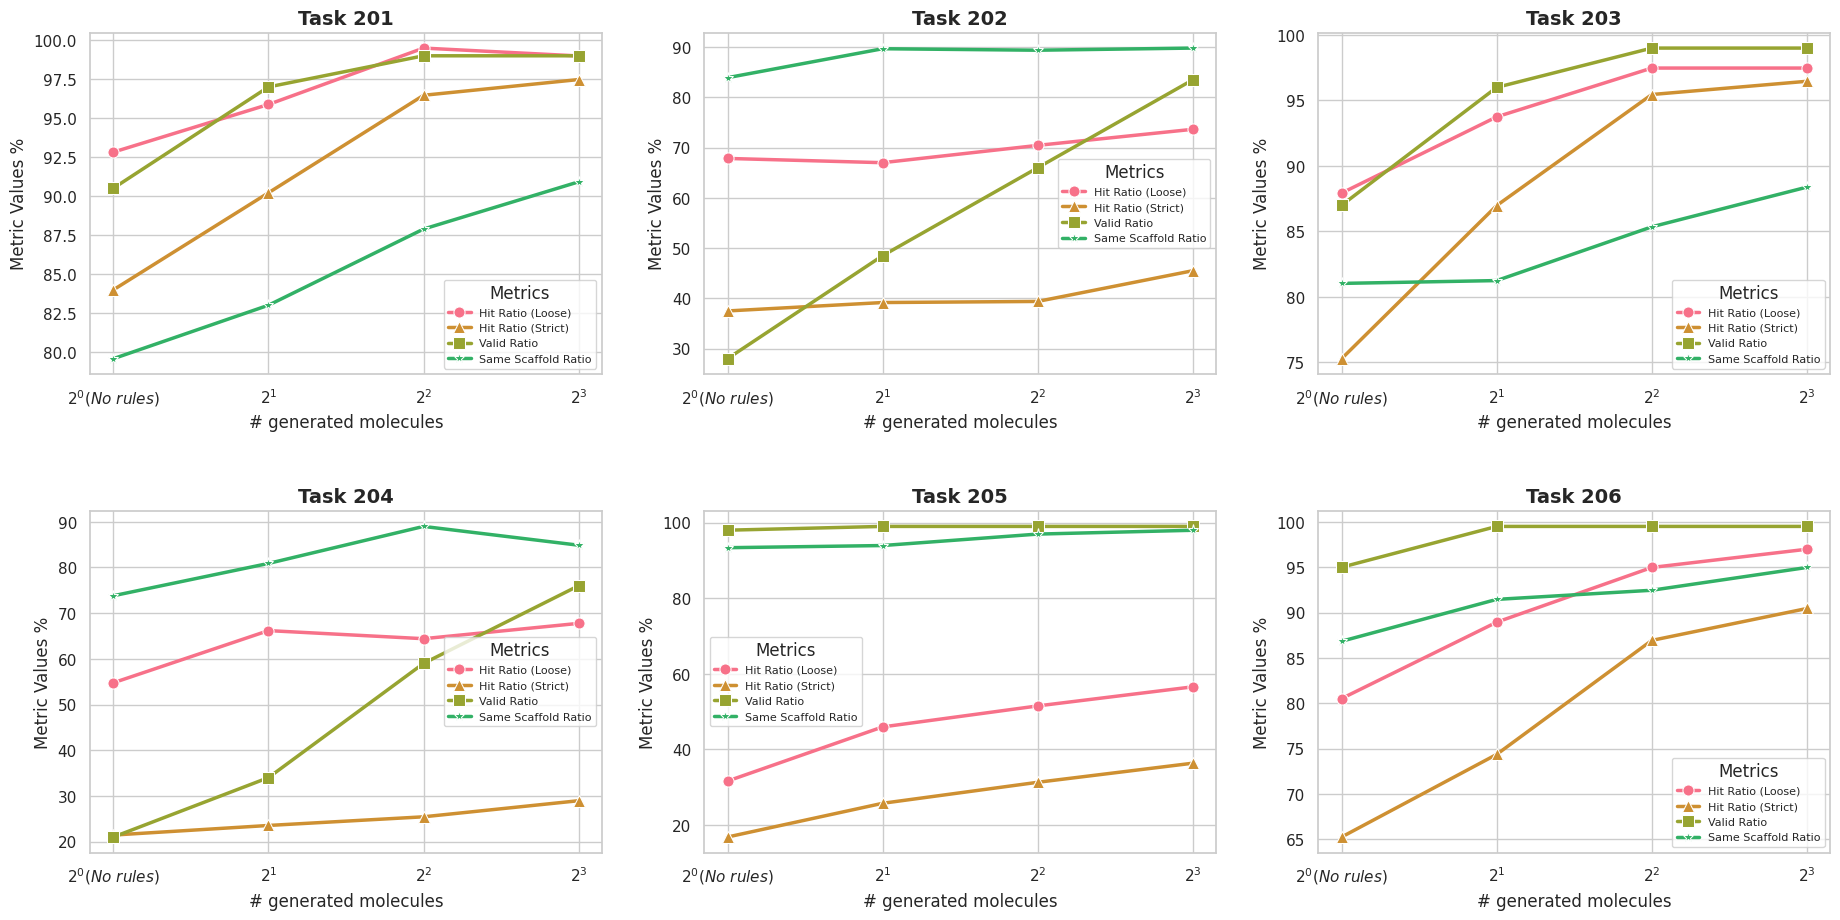

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
df = pd.read_csv('./data/rules_multi.csv')
# exclude_task_ids = ['101', '102', '103', '104', '105', '106', '107', '108']
# df = df[~df['task_id'].isin(exclude_task_ids)]

# 设置绘图风格
sns.set(style="whitegrid")

# 创建一个画布，包含多个子图
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# 设置颜色和标记样式
palette = sns.color_palette("husl", 8)
markers = ['o', '^', 's', '*', 'D', 'p', 'H', '+']  # 颜色标记

# 指标列表
df_metrics = ["Hit Ratio(loose)", "Hit Ratio(strict)", "Valid Ratio", "Same Scaffold Ratio"]
name_metrics = ["Hit Ratio (Loose)", "Hit Ratio (Strict)", "Valid Ratio", "Same Scaffold Ratio"]

# 对数刻度刻度标签
def log_tick_labels(x, pos):
    if x == 1:
        return r'$2^0 (No\ rules)$'
    elif x == 2:
        return r'$2^1$'
    elif x == 4:
        return r'$2^2$'
    elif x == 8:
        return r'$2^3$'
    

# 遍历每个task_id
for i, task_id in enumerate(df["task_id"].unique()):
    ax = axes[i // 3, i % 3]
    df_task = df[df["task_id"] == task_id]
    
    # 遍历每个指标并绘制线条
    for j, metric in enumerate(name_metrics):
        sns.lineplot(data=df_task, x="k", y=df_metrics[j], ax=ax, 
                     label=name_metrics[j], color=palette[j], 
                     linestyle='-', linewidth=2.5, 
                     marker=markers[j], markersize=8)
    
    ax.set_title(f'Task {task_id}', fontsize=14, weight='bold')
    
    # 设置对数刻度
    ax.set_xscale('log', base=2)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(log_tick_labels))
    
    ax.legend(title="Metrics", loc="best", fontsize=8, frameon=True)

for ax in axes.flat:
    # if ax.is_last_row():
        ax.set_xlabel('# generated molecules', fontsize=12)
    # else:
    #     ax.set_xlabel('')

# 统一Y轴标签
for ax in axes.flat:
    ax.set_ylabel('Metric Values %', fontsize=12)


# 调整布局和移除背景白边
plt.subplots_adjust(left=0.08, right=0.95, bottom=0.08, top=0.9, wspace=0.2, hspace=0.4)

# plt.savefig('./pdf/rules_multi.pdf')
plt.show()


### Functional group analysis

/tmp/ipykernel_694723/4086356330.py:395: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = ax.boxplot(score_diffs, labels=labels, patch_artist=True,
/tmp/ipykernel_694723/4086356330.py:395: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = ax.boxplot(score_diffs, labels=labels, patch_artist=True,
/tmp/ipykernel_694723/4086356330.py:395: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = ax.boxplot(score_diffs, labels=labels, patch_artist=True,
[07:51:03] WARNING: not removing hydrogen atom without neighbors
[07:51:03] WARNING: not removing hydrogen atom without neighbors
[07:51:03] WARNING: not 

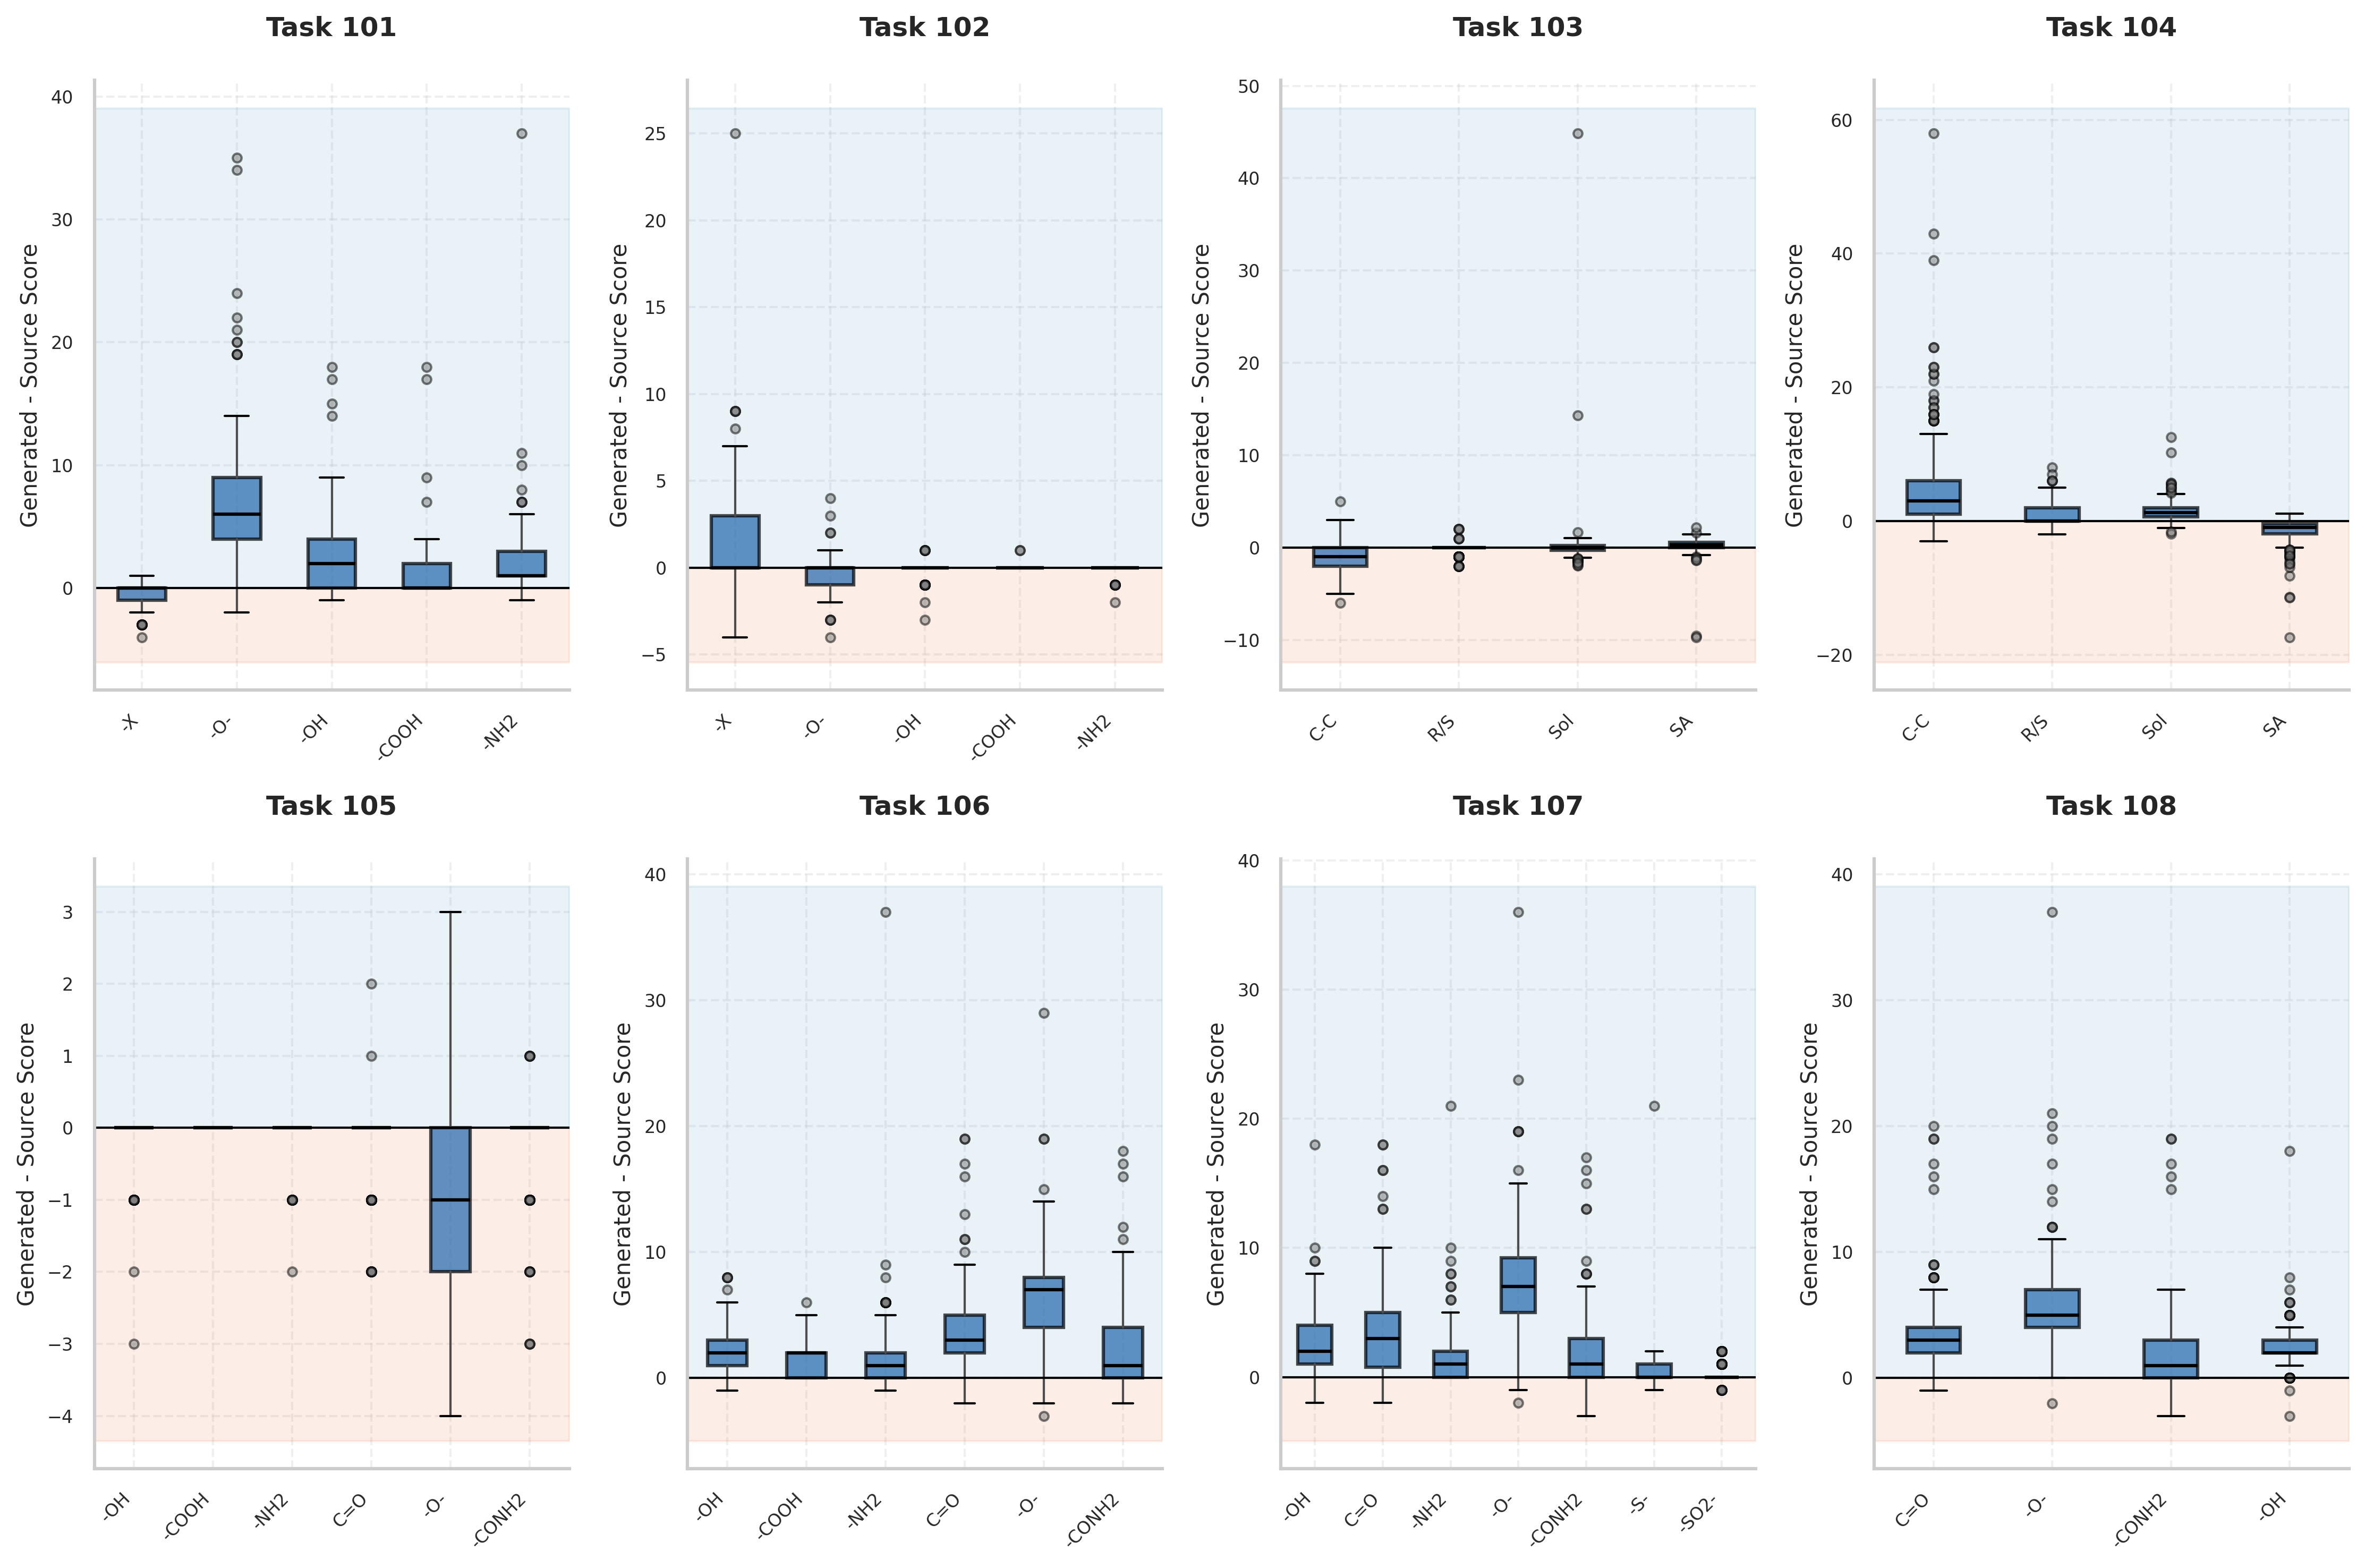

In [13]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors, Crippen
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

weight = json.load(open('./weight.wt', 'r'))

# 1. Molecular Weight (MW)
def calculate_molecular_weight(mol):
    if mol is None:
        return "Invalid SMILES string"
    return Descriptors.MolWt(mol)

# 2. Topological Polar Surface Area (TPSA)  
def calculate_tpsa(mol):
    if mol is None:
        return "Invalid SMILES string"
    return rdMolDescriptors.CalcTPSA(mol)

# 3. Hydrogen Bond Donors
def calculate_h_bond_donors(mol):
    if mol is None:
        return "Invalid SMILES string"
    return Descriptors.NumHDonors(mol)

# 4. Hydrogen Bond Acceptors
def calculate_h_bond_acceptors(mol):
    if mol is None:
        return "Invalid SMILES string"
    return Descriptors.NumHAcceptors(mol)

# 5. Polarizability (Approximated by MolMR)
def calculate_polarizability(mol):
    if mol is None:
        return "Invalid SMILES string"
    return Descriptors.MolMR(mol)

# 6. LogP (Partition Coefficient)
def calculate_logp(mol):
    if mol is None:
        return "Invalid SMILES string"
    return Crippen.MolLogP(mol)

# 7. Number of Rotatable Bonds
def calculate_num_rotatable_bonds(mol):
    if mol is None:
        return "Invalid SMILES string"
    return Descriptors.NumRotatableBonds(mol)

# 8. Formal Charge
def calculate_charge(mol):
    if mol is None:
        return "Invalid SMILES string"
    return Chem.GetFormalCharge(mol)

# 9. Stereochemistry (Chiral Centers)
def calculate_num_chiral_centers(mol):
    if mol is None:
        return "Invalid SMILES string"
    chiral_centers = Chem.FindMolChiralCenters(mol, includeUnassigned=True)
    return len(chiral_centers)

# 10. Solubility (Approximated by LogS using Crippen LogP)
def calculate_solubility(mol):
    if mol is None:
        return "Invalid SMILES string"
    logp = Crippen.MolLogP(mol)
    logS = 0.16 - 0.63 * logp  # Approximate formula for LogS
    return logS

# 11. Synthetic Accessibility (SA)
def calculate_synthetic_accessibility(mol):
    if mol is None:
        return "Invalid SMILES string"
    mw = Descriptors.MolWt(mol)
    num_rings = Chem.rdMolDescriptors.CalcNumRings(mol)
    return 10 - (0.01 * mw + 0.5 * num_rings)  # Simple SA approximation

# 12. Hydroxyl (-OH) Group
def calculate_num_hydroxyl_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    hydroxyl_pattern = Chem.MolFromSmarts('[OX2H]')
    return len(mol.GetSubstructMatches(hydroxyl_pattern))

# 13. Carboxyl (-COOH) Group
def calculate_num_carboxyl_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    carboxyl_pattern = Chem.MolFromSmarts('C(=O)[OH]')
    return len(mol.GetSubstructMatches(carboxyl_pattern))

# 14. Amino (-NH2) Group
def calculate_num_amino_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    amino_pattern = Chem.MolFromSmarts('[NX3H2]')
    return len(mol.GetSubstructMatches(amino_pattern))

# 15. Ether (R-O-R') Group
def calculate_num_ether_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    ether_pattern = Chem.MolFromSmarts('O')
    return len(mol.GetSubstructMatches(ether_pattern))

# 16. Phosphate (PO4) Group
def calculate_num_phosphate_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    phosphate_pattern = Chem.MolFromSmarts('P(=O)(O)(O)O')
    return len(mol.GetSubstructMatches(phosphate_pattern))

# 17. Amide (C(O)NH2) Group
def calculate_num_amide_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    amide_pattern = Chem.MolFromSmarts('C(=O)N')
    return len(mol.GetSubstructMatches(amide_pattern))

# 18. Nitrile (-C≡N) Group
def calculate_num_nitrile_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    nitrile_pattern = Chem.MolFromSmarts('C#N')
    return len(mol.GetSubstructMatches(nitrile_pattern))

# 19. Sulfonyl (SO2) Group
def calculate_num_sulfonyl_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    sulfonyl_pattern = Chem.MolFromSmarts('S(=O)(=O)')
    return len(mol.GetSubstructMatches(sulfonyl_pattern))

# 20. Nitro (-NO2) Group
def calculate_num_nitro_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    nitro_pattern = Chem.MolFromSmarts('N(=O)(=O)')
    return len(mol.GetSubstructMatches(nitro_pattern))

# 21. Thioether (R-S-R') Group
def calculate_num_thioether_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    thioether_pattern = Chem.MolFromSmarts('S')
    return len(mol.GetSubstructMatches(thioether_pattern))

# 22. Imidazole Ring (e.g., in Histidine)
def calculate_num_imidazole_rings(mol):
    if mol is None:
        return "Invalid SMILES string"
    imidazole_pattern = Chem.MolFromSmarts('n1cncc1')
    return len(mol.GetSubstructMatches(imidazole_pattern))

# 23. Carboxylate Ions (R-COO-)
def calculate_num_carboxylate_ions(mol):
    if mol is None:
        return "Invalid SMILES string"
    carboxylate_pattern = Chem.MolFromSmarts('C(=O)[O-]')
    return len(mol.GetSubstructMatches(carboxylate_pattern))

# 24. Number of Aromatic Rings
def calculate_num_aromatic_rings(mol):
    if mol is None:
        return "Invalid SMILES string"
    num_aromatic_rings = Chem.rdMolDescriptors.CalcNumAromaticRings(mol)
    return num_aromatic_rings

# 25. Presence of Halogens (F, Cl, Br, I)
def calculate_num_halogens(mol):
    if mol is None:
        return "Invalid SMILES string"
    halogen_smarts = Chem.MolFromSmarts('[F,Cl,Br,I]')
    num_halogens = len(mol.GetSubstructMatches(halogen_smarts))
    return num_halogens

# 26 Function to calculate the number of Carbonyl (C=O) groups
def calculate_num_carbonyl_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    carbonyl_pattern = Chem.MolFromSmarts('C=O')
    return len(mol.GetSubstructMatches(carbonyl_pattern))

# 27 Function to calculate the number of Sulfonamide (-SO2NH2) groups
def calculate_num_sulfonamide_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    sulfonamide_pattern = Chem.MolFromSmarts('S(=O)(=O)N')
    return len(mol.GetSubstructMatches(sulfonamide_pattern))

# 28 Function to calculate the number of Thiol (-SH) groups
def calculate_num_thiol_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    thiol_pattern = Chem.MolFromSmarts('[SH]')
    return len(mol.GetSubstructMatches(thiol_pattern))

# 29 Function to calculate the number of Aromatic Nitro (-NO2) groups
def calculate_num_aromatic_nitro_groups(mol):
    if mol is None:
        return "Invalid SMILES string"
    aromatic_nitro_pattern = Chem.MolFromSmarts('[$([NX3](=O)=O)]c')
    return len(mol.GetSubstructMatches(aromatic_nitro_pattern))

def logP_score(mol):
    hydroxyl_groups = calculate_num_hydroxyl_groups(mol)
    carboxyl_groups = calculate_num_carboxyl_groups(mol)
    amino_groups = calculate_num_amino_groups(mol)
    halogens = calculate_num_halogens(mol)  
    ether_groups = calculate_num_ether_groups(mol)
    return  halogens, ether_groups, hydroxyl_groups, carboxyl_groups, amino_groups

def qed_score(mol):
    mw = calculate_molecular_weight(mol)
    logp = calculate_logp(mol)
    tpsa = calculate_tpsa(mol)
    h_bond_donors = calculate_h_bond_donors(mol)
    h_bond_acceptors = calculate_h_bond_acceptors(mol)
    aromatic_rings = calculate_num_aromatic_rings(mol)
    rotatable_bonds = calculate_num_rotatable_bonds(mol)
    charge = calculate_charge(mol)
    stereochemistry = calculate_num_chiral_centers(mol)
    solubility = calculate_solubility(mol)
    sa = calculate_synthetic_accessibility(mol)
    
    return rotatable_bonds, stereochemistry, solubility, sa



def TPSA_score(mol):
    hydroxyl_groups = calculate_num_hydroxyl_groups(mol)
    carboxyl_groups = calculate_num_carboxyl_groups(mol)
    amino_groups = calculate_num_amino_groups(mol)
    carbonyl_groups = calculate_num_carbonyl_groups(mol)
    sulfonamide_groups = calculate_num_sulfonamide_groups(mol)
    ether_groups = calculate_num_ether_groups(mol)
    thiol_groups = calculate_num_thiol_groups(mol)
    phosphate_groups = calculate_num_phosphate_groups(mol)
    amide_groups = calculate_num_amide_groups(mol)
    nitro_groups = calculate_num_nitro_groups(mol)  
    return hydroxyl_groups, carboxyl_groups, amino_groups, carbonyl_groups, ether_groups, amide_groups



def HBA_score(mol):
    hydroxyl_groups = calculate_num_hydroxyl_groups(mol)
    carbonyl_groups = calculate_num_carbonyl_groups(mol)
    amino_groups = calculate_num_amino_groups(mol)
    ether_groups = calculate_num_ether_groups(mol)
    phosphate_groups = calculate_num_phosphate_groups(mol)
    carboxylate_groups = calculate_num_carboxylate_ions(mol)
    nitrile_groups = calculate_num_nitrile_groups(mol)
    amide_groups = calculate_num_amide_groups(mol)
    thioether_groups = calculate_num_thioether_groups(mol)
    sulfonyl_groups = calculate_num_sulfonyl_groups(mol)    
    return hydroxyl_groups, carbonyl_groups, amino_groups, ether_groups, amide_groups, thioether_groups, sulfonyl_groups


def HBD_score(mol):
    carbonyl_groups = calculate_num_carbonyl_groups(mol)    
    nitro_groups = calculate_num_nitro_groups(mol)
    ether_groups = calculate_num_ether_groups(mol)
    amide_groups = calculate_num_amide_groups(mol)
    aromatic_nitro_compounds = calculate_num_aromatic_nitro_groups(mol)
    sulfonyl_groups = calculate_num_sulfonyl_groups(mol)
    phosphoryl_groups = calculate_num_phosphate_groups(mol)
    hydroxyl_groups = calculate_num_hydroxyl_groups(mol)
    imidazole_rings = calculate_num_imidazole_rings(mol)
    carboxylate_ions = calculate_num_carboxylate_ions(mol)      
    return carbonyl_groups, ether_groups, amide_groups, hydroxyl_groups


def mix_score(mol, task_id):
    if task_id in ['201', '202']:
        if task_id == '201':
            score = -logP_score(mol) + HBA_score(mol)
        else:
            score = logP_score(mol) + HBA_score(mol)
    elif task_id in ['203', '204']:
        if task_id == '203':
            score = -logP_score(mol) + HBD_score(mol)
        else:
            score = logP_score(mol) + HBD_score(mol) 
    elif task_id in ['205', '206']:
        if task_id == '205':
            score = - TPSA_score(mol) + logP_score(mol)
        else:
            score =  TPSA_score(mol) - logP_score(mol) 
    else:
        raise ValueError(f"未知的任务ID: {task_id}")
    return score

def calculate_scores(smiles_list, task_id):
    scores_dict = {}
    
    for smiles in smiles_list:
        # Convert float to string if needed
        if isinstance(smiles, float):
            continue
            
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            continue
            
        if task_id in ['101', '102']:
            score = logP_score(mol)  
        elif task_id in ['103', '104']:
            score = qed_score(mol)
        elif task_id in ['105', '106']:
            score = TPSA_score(mol)
        elif task_id == '107':
            score = HBA_score(mol)
        elif task_id == '108':
            score = HBD_score(mol)
        elif task_id in ['201', '202', '203', '204', '205', '206']:
            score = mix_score(mol, task_id)
        elif task_id == '301':
            score = qed_score(mol)
        elif task_id in ['109', '110']:
            score = TPSA_score(mol)
        else:
            raise ValueError(f"未知的任务ID: {task_id}")
        
        scores_dict[smiles] = score

    return scores_dict

def visualize_task_comparison():
    task_ids = ['101', '102', '103', '104', '105', '106', '107', '108']
    
    task_id_labels = {
        '101': ['-X', '-O-', '-OH', '-COOH', '-NH2'],
        '102': ['-X', '-O-', '-OH', '-COOH', '-NH2'], 
        '103': ['C-C', 'R/S', 'Sol', 'SA'],
        '104': ['C-C', 'R/S', 'Sol', 'SA'],
        '105': ['-OH', '-COOH', '-NH2', 'C=O', '-O-', '-CONH2'],
        '106': ['-OH', '-COOH', '-NH2', 'C=O', '-O-', '-CONH2'],
        '107': ['-OH', 'C=O', '-NH2', '-O-', '-CONH2', '-S-', '-SO2-'],
        '108': ['C=O', '-O-', '-CONH2', '-OH'],
    }

    n_rows = (len(task_ids) + 2) // 4
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5*n_rows), dpi=300)
    axes = axes.flatten()
    
    # Nature风格的配色方案
    colors = {
        'box_face': '#2166AC',     # 箱线图填充色
        'median': '#000000',       # 中位线颜色
        'whisker': '#4D4D4D',      # 须线颜色
        'positive_area': '#67A9CF', # 正区域填充色
        'negative_area': '#EF8A62', # 负区域填充色
        'grid': '#CCCCCC',         # 网格线颜色
        'zero_line': '#000000'     # 零线颜色
    }
    
    # plt.style.use('seaborn-whitegrid')
    
    for idx, task_id in enumerate(task_ids):
        df = pd.read_csv('/inspire/hdd/ws-f4d69b29-e0a5-44e6-bd92-acf4de9990f0/public-project/yujiajun-240108120114/llm4drug/output/base_galactica30b_mol_{}x_16_scaffold.csv'.format(task_id))
        source_scores = calculate_scores(df['mol'].tolist(), task_id)
        generated_scores = calculate_scores(df['gene_mol'].tolist(), task_id)
        
        if source_scores and generated_scores:
            source_values = np.array(list(source_scores.values()))
            generated_values = np.array(list(generated_scores.values()))
            
            score_diffs = []
            labels = []
            
            n_dimensions = len(source_values[0]) if isinstance(source_values[0], (list, tuple, np.ndarray)) else 1
            
            for dim in range(n_dimensions):
                if n_dimensions > 1:
                    dim_source = source_values[:, dim]
                    dim_generated = generated_values[:, dim]
                else:
                    dim_source = source_values
                    dim_generated = generated_values
                
                min_len = min(len(dim_source), len(dim_generated))
                dim_source = dim_source[:min_len]
                dim_generated = dim_generated[:min_len]
                
                diff = dim_generated - dim_source
                score_diffs.append(diff)
                labels.append(task_id_labels[task_id][dim])
            
            ax = axes[idx]
            
            # 绘制箱线图
            box_parts = ax.boxplot(score_diffs, labels=labels, patch_artist=True,
                                 medianprops=dict(color=colors['median'], linewidth=1.5),
                                 whiskerprops=dict(color=colors['whisker']),
                                 flierprops=dict(marker='o', markerfacecolor='gray',
                                               markersize=4, alpha=0.5))
            
            # 添加零线
            ax.axhline(y=0, color=colors['zero_line'], linestyle='-', linewidth=1)
            
            # 填充正负区域
            ymin, ymax = ax.get_ylim()
            ax.fill_between(ax.get_xlim(), 0, ymin, alpha=0.15, color=colors['negative_area'])
            ax.fill_between(ax.get_xlim(), 0, ymax, alpha=0.15, color=colors['positive_area'])
            
            # 设置箱线图颜色
            for box in box_parts['boxes']:
                box.set_facecolor(colors['box_face'])
                box.set_alpha(0.7)
                box.set_linewidth(1.5)
            
            ax.set_xticklabels(labels, rotation=45, ha='right')
            ax.set_title(f'Task {task_id}', pad=20, fontsize=12, fontweight='bold')
            ax.set_ylabel('Generated - Source Score', fontsize=10)
            ax.tick_params(axis='both', which='major', labelsize=8)
            
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_linewidth(1.5)
            ax.spines['bottom'].set_linewidth(1.5)
            ax.grid(True, linestyle='--', alpha=0.3, color=colors['grid'])
    
    for idx in range(len(task_ids), len(axes)):
        fig.delaxes(axes[idx])
        
    plt.tight_layout()
    plt.show()
visualize_task_comparison()

### Molecule Direction

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

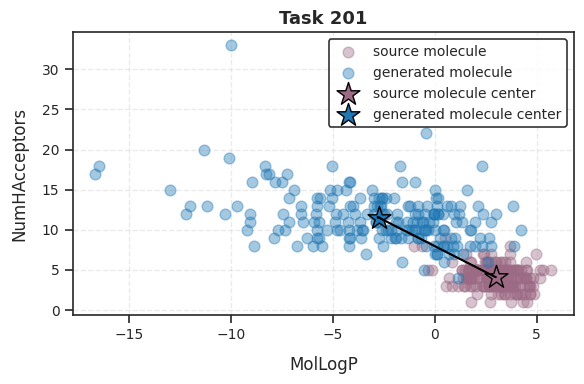

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

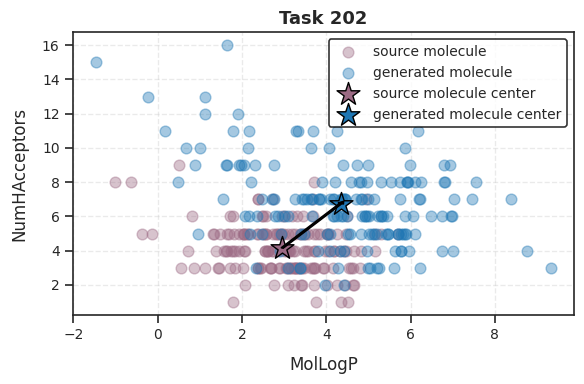

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

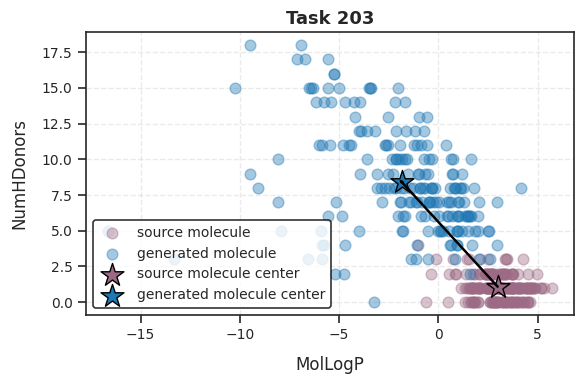

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

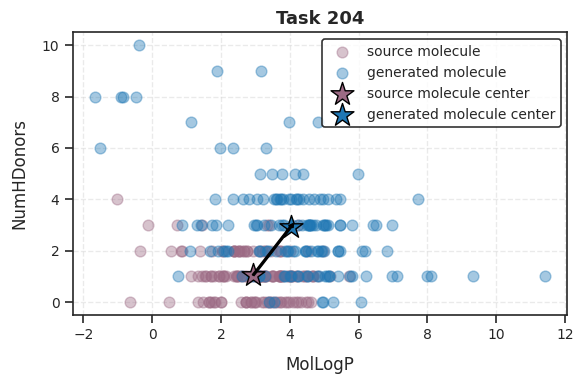

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

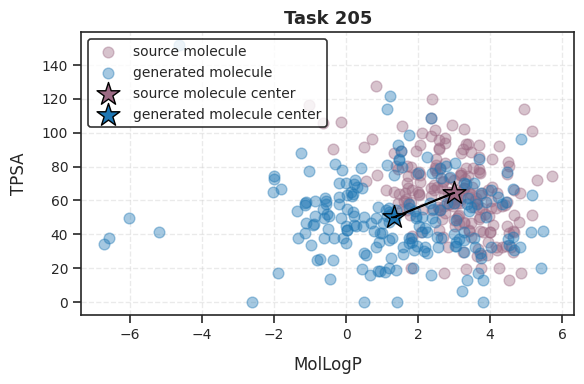

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

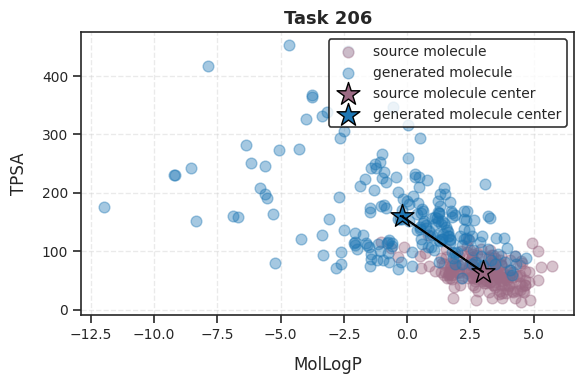

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

task_list = {
    "201": ["MolLogP", "NumHAcceptors"], "202": ["MolLogP", "NumHAcceptors"],
    "203": ["MolLogP", "NumHDonors"], "204": ["MolLogP", "NumHDonors"], 
    "205": ["MolLogP", "TPSA"], "206": ["MolLogP", "TPSA"]
}

# Set the style to match Nature publication standards
# plt.style.use('seaborn-whitegrid')
sns.set_style("ticks")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2

# Create a figure with 2x3 subplots
# fig, axes = plt.subplots(2, 3, figsize=(20, 10))
# axes = axes.ravel()

np.random.seed(42)

for idx, task_id in enumerate(['201','202','203','204','205','206']):
    plt.figure(figsize=(6,4))
    df = pd.read_csv('./data/base_galactica30b_base_{}_16_scaffold.csv'.format(task_id))
    x_prop = task_list[task_id][0]
    y_prop = task_list[task_id][1]
    df = df[df['gene_'+x_prop]!=-999]
    df = df[df['gene_'+y_prop]!=-999]
    df = df[df[x_prop]!=-999]
    df = df[df[y_prop]!=-999]
    x1 = df[x_prop].values.tolist()
    y1 = df[y_prop].values.tolist()
    x2 = df['gene_'+x_prop].values.tolist()
    y2 = df['gene_'+y_prop].values.tolist()

    # Calculate centers
    center1_x = np.mean(x1)
    center1_y = np.mean(y1)
    center2_x = np.mean(x2)
    center2_y = np.mean(y2)

    # Plot on the corresponding subplot
    ax = plt.gca()
    
    # Plot the scatter points
    scatter1 = ax.scatter(x1, y1, c='#9c6a84', alpha=0.4, s=60, label='source molecule')
    scatter2 = ax.scatter(x2, y2, c='#1f77b4', alpha=0.4, s=60, label='generated molecule')

    # Plot centers with larger stars
    ax.scatter(center1_x, center1_y, c='#9c6a84', s=300, marker='*', label='source molecule center',
              linewidth=1, edgecolor='black')
    ax.scatter(center2_x, center2_y, c='#1f77b4', s=300, marker='*', label='generated molecule center',
              linewidth=1, edgecolor='black')
    ax.set_title('Task '+task_id, fontsize=13, fontweight='bold')
    # Draw arrow between centers
    ax.arrow(center1_x, center1_y, center2_x-center1_x, center2_y-center1_y,
             head_width=0.15, head_length=0.15, fc='black', ec='black',
             width=0.06)

    ax.set_xlabel(x_prop, fontsize=12, labelpad=10)
    ax.set_ylabel(y_prop, fontsize=12, labelpad=10)
    ax.tick_params(axis='both', which='major', labelsize=10, width=1.2)
    
    legend = ax.legend(frameon=True, fontsize=10, markerscale=1)
    legend.get_frame().set_linewidth(1.2)
    legend.get_frame().set_edgecolor('black')
    
    ax.grid(True, linestyle='--', alpha=0.4, linewidth=1.0)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)

    # Adjust layout
    plt.tight_layout()

    # Save combined figure as PDF
    # plt.savefig('./svg/{}_scatter.svg'.format(task_id), bbox_inches='tight')
    plt.show()
